In [1]:
%matplotlib inline

In [2]:
from IPython.display import Image
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import pandas as pd

sns.set(style="whitegrid")

The goal here is to have a final notebook that a Product Manager could read through in order to create a slide deck to report to the LT (Leadership Team). You can help the PM by including 1-3 bullet points for each item in addition to the regular discussion (this is the only modification to the EDA framework).

# Brandon Morrow Case Study 1

# 1. ETL

Variables
1. price price in US dollars ($326--$18,823) (Numerical)
2. carat weight of the diamond (0.2--5.01) (Numerical)
3. cut quality of the cut (Fair, Good, Very Good, Premium, Ideal) (Categorical)
4. color diamond colour, from J (worst) to D (best) (Categorical)
5. clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) (Categorical)
6. x length in mm (0--10.74) (Numerical)
7. y width in mm (0--58.9) (Numerical)
8. z depth in mm (0--31.8) (Numerical)
9. depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) (Numerical)
10. table width of top of diamond relative to widest point (43--95) (Numerical)

1. Price:       Numerical
2. Carat:       Numerical
3. Cut:         Categorical
4. Color:       Categorical
5. Clarity:     Categorical
6. Length(x):   Numerical
7. Width(y):    Numerical
8. Depth(z):    Numerical
9. Depth(%):    Numerical
9. Table Width: Numerical

In [3]:
diamonds = pd.read_csv("diamonds.csv", index_col=0)

Now we need to confirm that the dataframe has been read in correctly and that we have all of our variables.

In [4]:
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

I want to reorder this dataframe just to make it match our description for readability:

In [5]:
diamonds = diamonds[["price", "carat", "cut", "color", "clarity", "x", "y", "z", "depth", "table",]]

In [6]:
diamonds.head()

price  carat      cut color clarity     x     y     z  depth  table
1    326   0.23    Ideal     E     SI2  3.95  3.98  2.43   61.5   55.0
2    326   0.21  Premium     E     SI1  3.89  3.84  2.31   59.8   61.0
3    327   0.23     Good     E     VS1  4.05  4.07  2.31   56.9   65.0
4    334   0.29  Premium     I     VS2  4.20  4.23  2.63   62.4   58.0
5    335   0.31     Good     J     SI2  4.34  4.35  2.75   63.3   58.0

Now we have the dataframe formated how we want lets make sure there are no null values:

In [7]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   x        53940 non-null  float64
 6   y        53940 non-null  float64
 7   z        53940 non-null  float64
 8   depth    53940 non-null  float64
 9   table    53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


Perfect we have no null values for any of our variables. Prices are at whole integers and the measurements are floats. Categorical variables are objects as we would expect to see. 

# 2. EDA

## Causal Loop Diagram

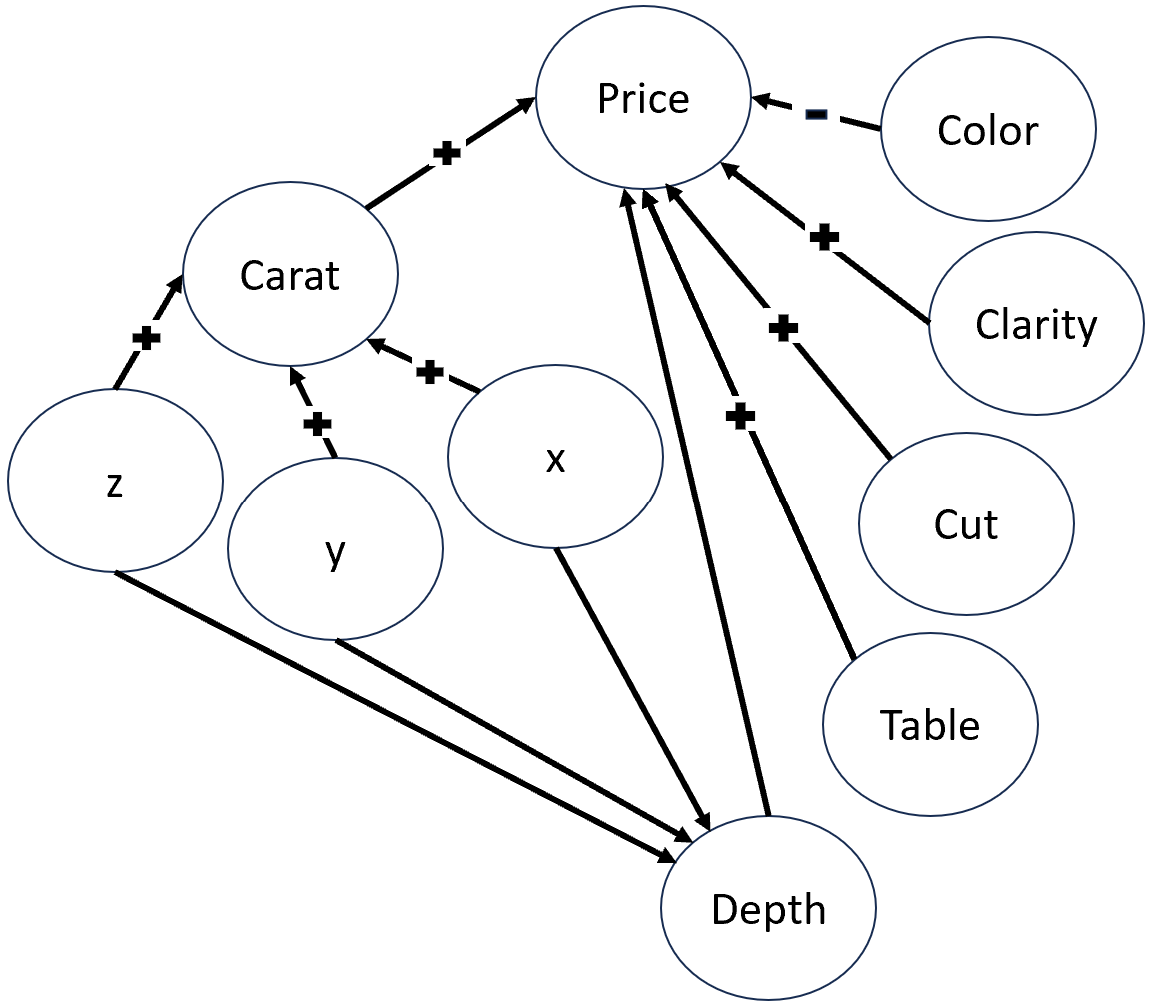

In [8]:
Image("Images/Causal_Loop_Diagram.png", width=600, height=600)

Based off domain knowledge research:
* price is the target variable
* As the color increases price should decrease
* As clarity increases price should increase
* As cut increases price will increase
* As table approaches ideal range price increases
* As depth approaches ideal range price increases
* x, y and z affect carat size and depth
* As carat increases price increases

<a id="single_variable_eda"></a> 
## Single Variable EDA

We will first do an analysis of each variable to get an idea of what we are working with. Below are hyperlinks to take you to each variable faster.

* [Price](#price)
* [Carat](#carat)
* [Cut](#cut)
* [Color](#color) 
* [Clarity](#clarity)
* [Length (x)](#length)
* [Width  (y)](#width)    
* [Depth  (z)](#depthz)
* [Depth  (%)](#depth%)
* [Table Width](#tablewidth)

These functions will be used throughout single variable EDA:

In [9]:
def freeman_diaconis( data):
    quartiles = stats.mstats.mquantiles( data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[ 0]
    n = len( data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int( h)

In [10]:
def plot_single_variable(dataframe, variable, normal=False, mean_marker=False, median_marker=False, number_bins=0):
    figure = plt.figure(figsize=(10, 6))
    axes = figure.add_subplot(1, 1, 1)

    # Freeman Diaconis defined bins
    if number_bins == 0:
        h = freeman_diaconis(dataframe[variable])
        h = max(1, h)
        print("Freeman Diaconis: ", h)
        mn = int(dataframe[variable].min())
        mx = int(dataframe[variable].max())
        bins = [i for i in range( mn, mx, h)]
        axes.set_title(f"{variable.capitalize()} Distribution - Freeman Diaconis = {h}")
        axes.set_ylabel("Frequency")
        if normal:
            axes.set_title(f"{variable.capitalize()} Distribution - Freeman Diaconis = {h} - Normalized")
    elif number_bins != 0:   # User defined bins
        bins = number_bins
        axes.set_title(f"{variable.capitalize()} Distribution - {number_bins} Bins")
        if normal:
            axes.set_title(f"{variable.capitalize()} Distribution - {number_bins} Bins - Normalized")
    
    if mean_marker:
        axes.axvline(dataframe[variable].mean(), color="DarkRed", label="Mean")
        axes.legend()
    if median_marker:
        axes.axvline(dataframe[variable].median(), color="DarkOrange", label="Median")
        axes.legend()
    
    axes.hist(dataframe[variable], bins=bins, color="dimgray", density=normal)
    axes.set_xlabel(f"{variable.capitalize()}")

    plt.show()
    plt.close()


<a id="price"></a> 
## Price
Diamond price is a straightforward variable and is a results of the characteristics of the diamond. I believe we will see a normal distribution. Lets see what price range we are working with here:

In [11]:
diamonds["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

We see that of the 53,940 diamonds there is a pricerange from $326 to a maximum of $18,823. The mean price is $3,932.79 and median price of $2,401. This is indicative of a strong right skew in the data with most of the diamonds being on the lower range prices. We also see a massive jump from the 75th percentile to the maximum value. 

Freeman Diaconis:  231


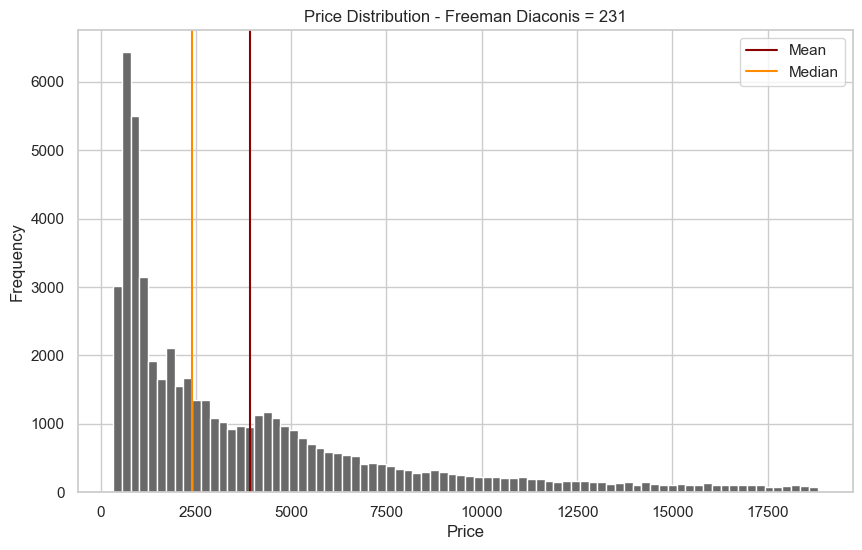

In [12]:
plot_single_variable(diamonds, "price", mean_marker=True, median_marker=True)

We do see a strong right skew here with 75% of the diamonds price under $5,324 but there is a maximum value of $18,823 <br>  <br> Notes for presentation: <br>

* The prices of diamonds range from $326 to $18,823 with an IQR from $950 to $5324
* The median diamond price is $2401 indicating a strong skew right
* The average diamond price is $3,932.80


 <br> [Return to Menu](#single-variable-eda)

<a id="carat"></a>
## Carat

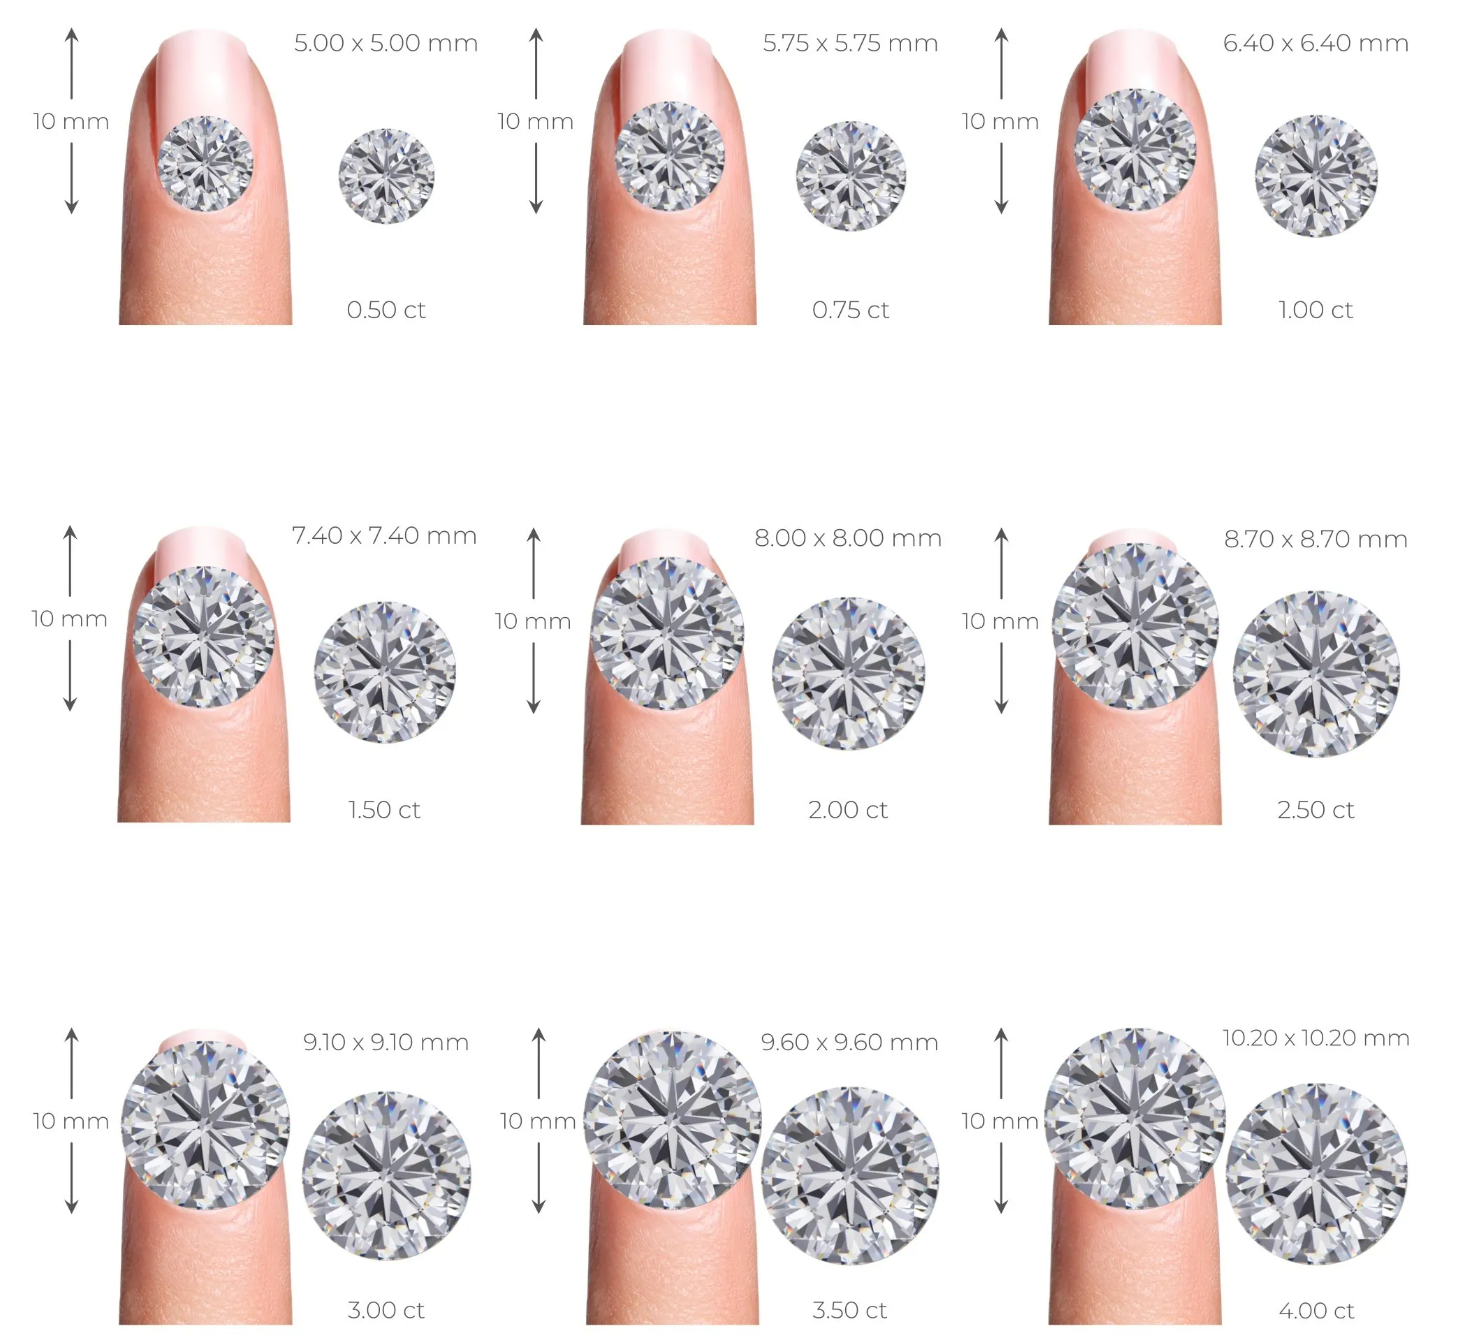

In [13]:
Image("Images/Carat.png", width="600", height="500")

Image [Source](https://diamondbuzz.blog/diamond-properties-and-characteristics/) <br>
Carats are the physical weight of diamonds. The method originates from the ancient method of weighing precious metals and gemstones against a seed of the carob tree since at the time they were thought to be even in weight. Now carats are each equal to 200 milligrams or 0.2 grams and is measured using highly accurate scales.  There is also a point, and points are one-hundreth of a carat with 100 points being one carat. I expect this will be lognormal and skewed to the right the same as price

In [14]:
diamonds["carat"].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

We see an interquartile range from 0.4 to 1.04. We see a range from 0.2 to 5.01. There is a large range from the 75% mark to the maximum the carats go from 1.04 to 5.01 so we see the strong skew that we saw in price. The average number of carats is 0.79 and the median is 0.7.

Freeman Diaconis:  1


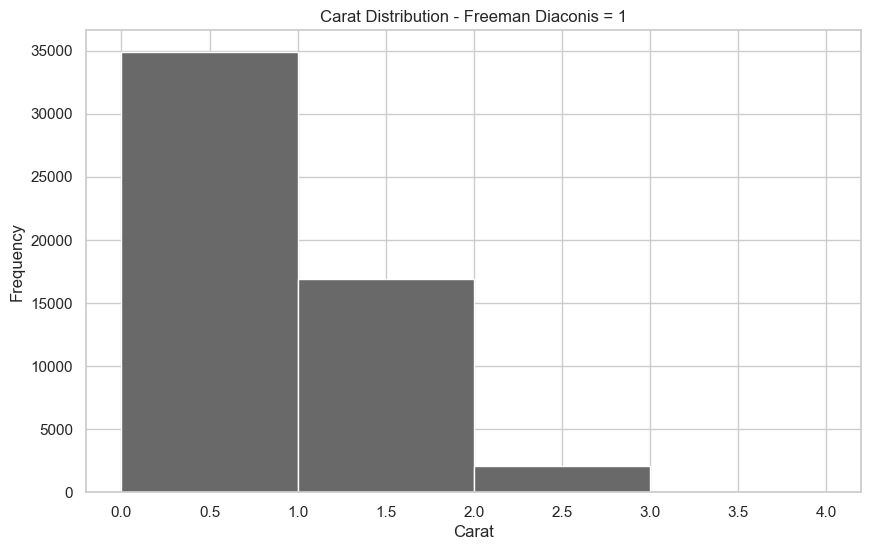

In [15]:
plot_single_variable(diamonds, "carat")

We see that the majority of the values here are under 3.  <br>  <br> Notes for presentation: <br>

* The majority of the diamonds are under 1 carat with mean 0.8 carats and median 0.7 carats
* The carat IQR is from 0.4 to 1.04
* The range is from 0.2 to 5.01 indicating a strong skew  to the right with outliers

 <br> [Price v Carat](#pvcarat) <br> [^ Return to Menu](#single-variable-eda)

<a id="cut"></a>
## Cut

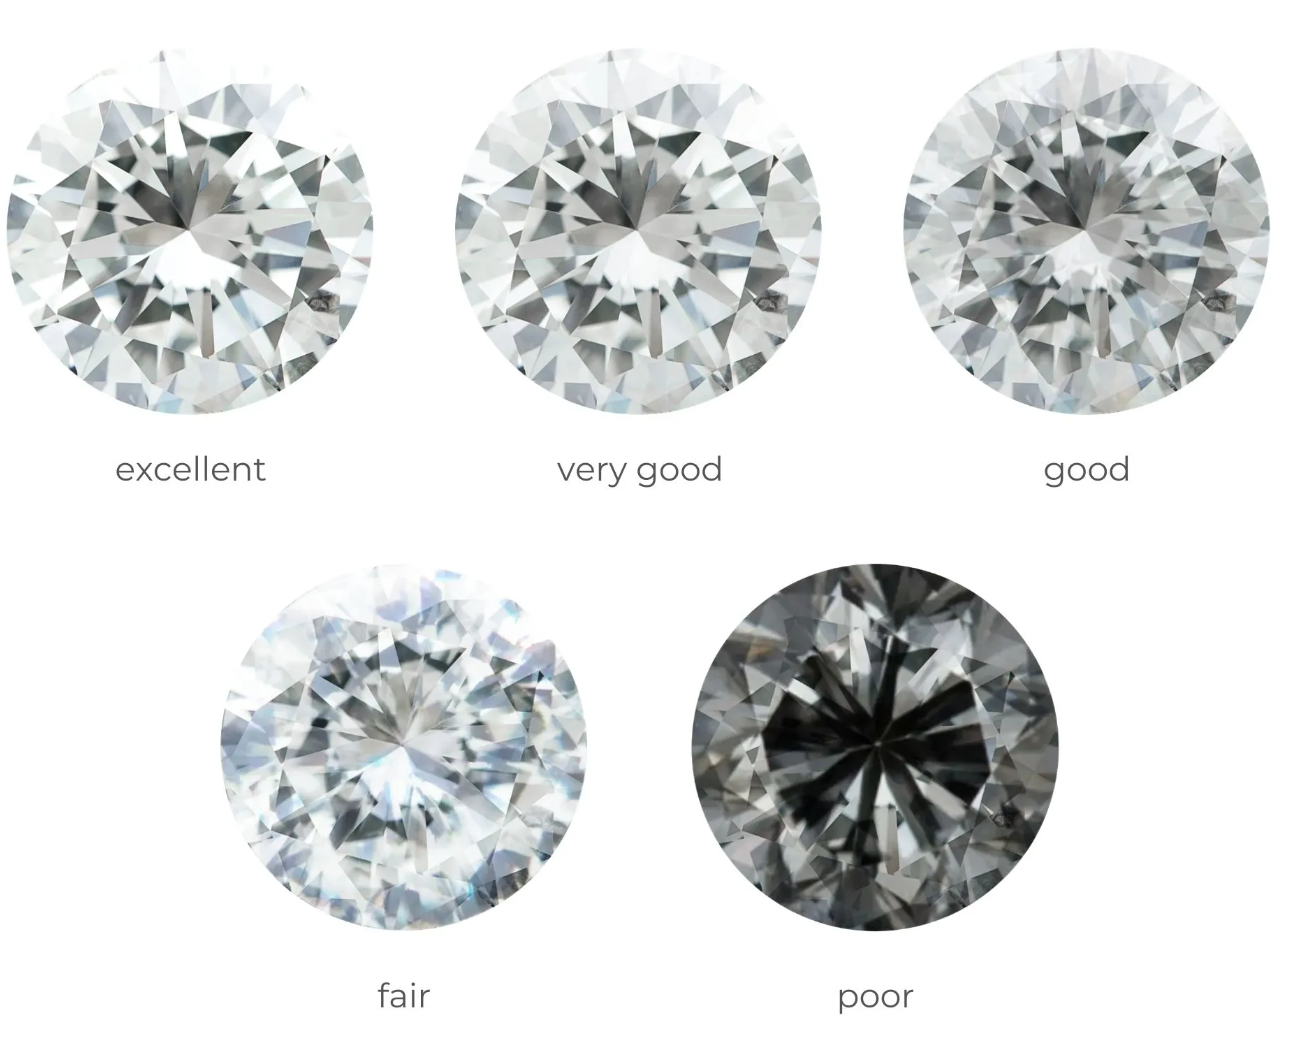

In [16]:
Image("Images/Cut.png", width="600", height="400")

Image [Source](https://diamondbuzz.blog/diamond-properties-and-characteristics/) <br>
Diamond cut explains how well a diamond is cut allowing more light to come through. Thus the darker the diamond appears the poorer the cut as displayed in the above graphic. This variable is categorical lets see how many we have in each category. There are different types of diamond cuts, but unfortunately we are not told what type of cut is represented in this dataset, and are only given their cut rating regarding passage of light. We should have more well cut diamonds than poor cut. <br><br> Cut from worst to best: (Fair, Good, Very Good, Premium, Ideal)

In [17]:
diamonds.cut.value_counts(normalize=False)

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

We see that the highest category are the best (ideal) cut diamonds followed by premium, very good, good and fair. Lets see what the proportions of each are.

In [18]:
diamonds["cut"].value_counts(normalize=True)

cut
Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: proportion, dtype: float64

So 39.95% of the diamonds are of the best cut grade, 25.56% are premium, 22.3% are very good, only 9.09% are good, and only 2.98% are fair. A large portion of diamonds appear to be generally well cut.

<Axes: title={'center': 'Cut of Diamonds Normalized'}, xlabel='cut'>

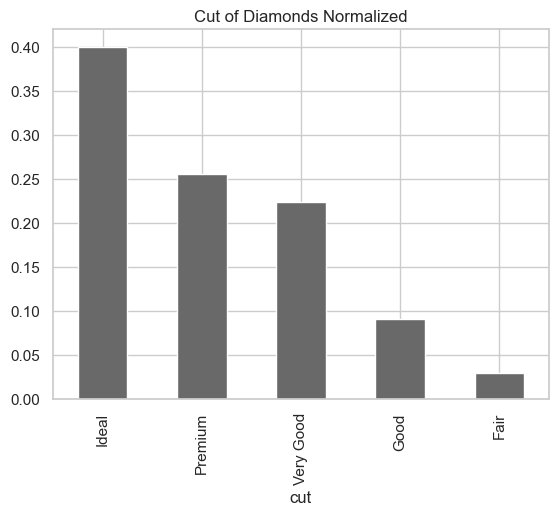

In [19]:
diamonds["cut"].value_counts(normalize=True).plot(kind="bar", title="Cut of Diamonds Normalized", color="dimgray")

We see that there are more of the high quality cut diamonds. <br><br>
21,551 (39.95%) of the diamonds are the best 'Ideal' cut grade <br>
13,791 (25.57%) of the diamonds are 'Premium' cut grade <br>
12,082 (22.40%) of the diamonds are 'Very Good' cut grade <br>
4,906 (9.10%) of the diamonds are 'Good' cut grade <br>
1,610 (2.98%) of the diamonds are 'Fair' cut grade

 <br>[Price v Cut](#pvcut) <br> [^ Return to Menu](#single-variable-eda)

<a id="color"></a>
## Color

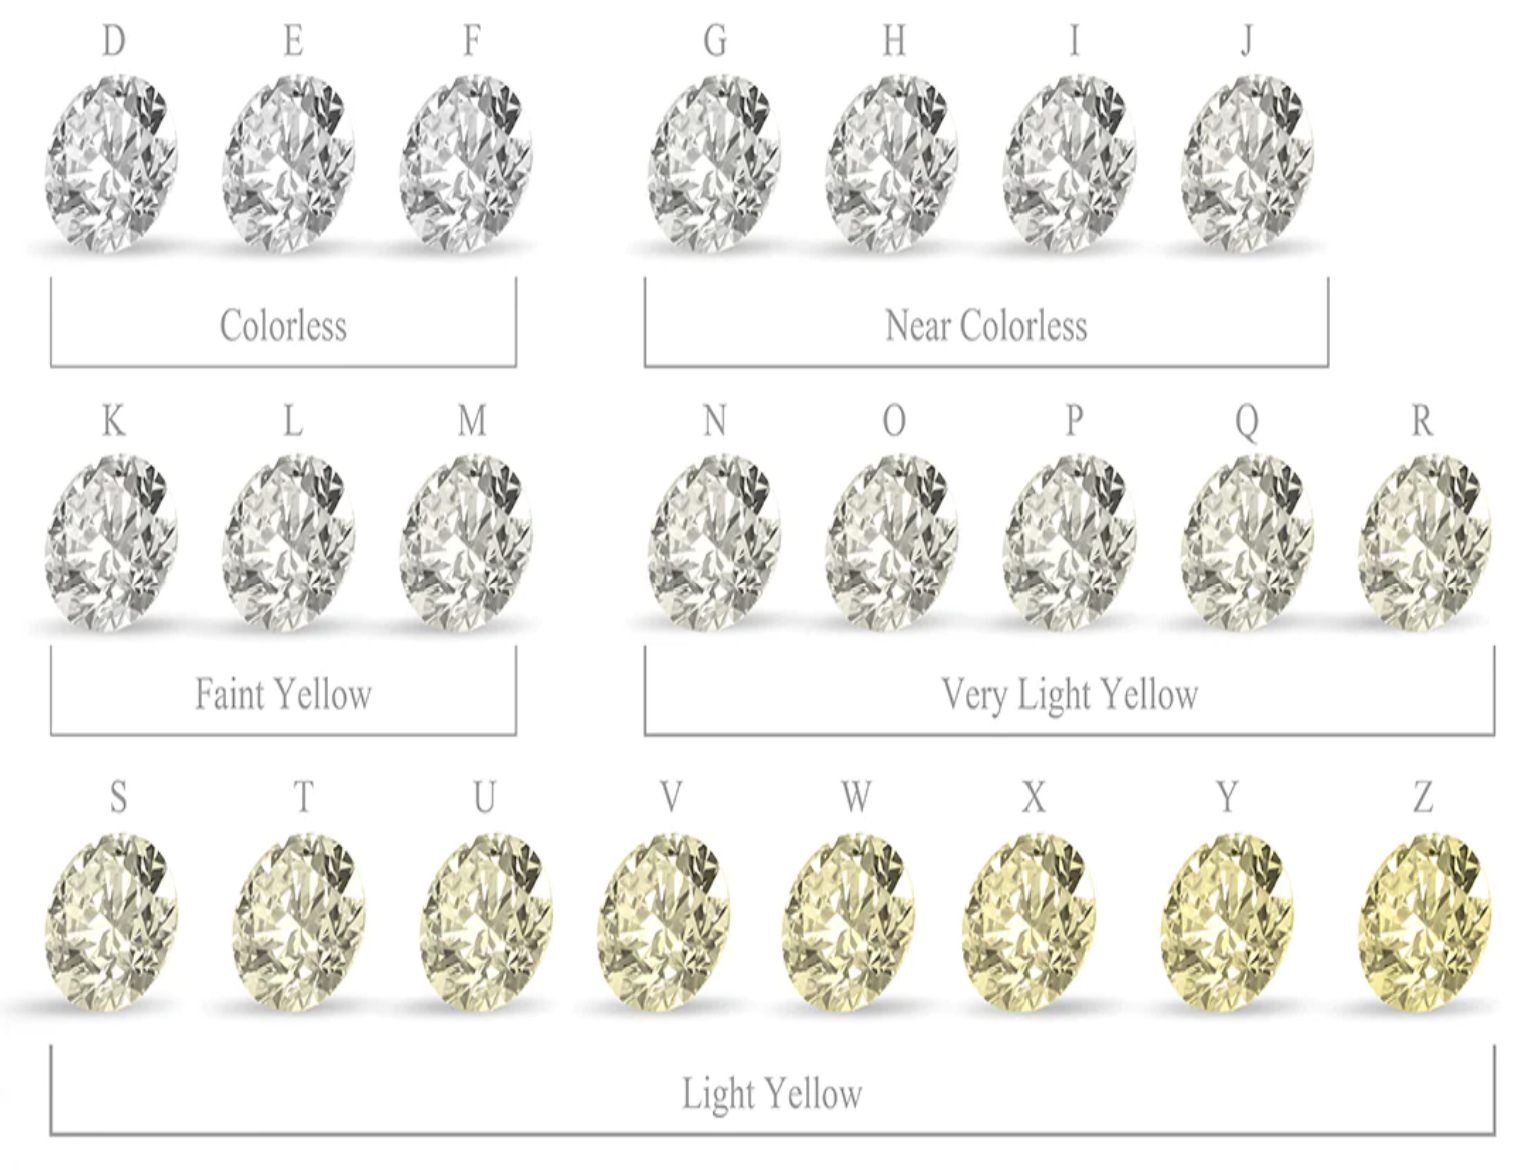

In [20]:
Image("Images/Colors_2.png", width=600, height=10)

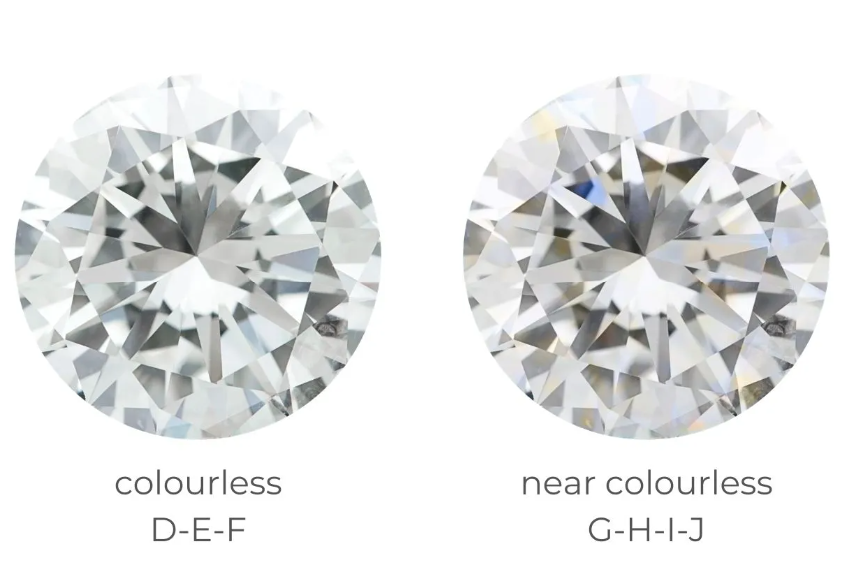

In [21]:
Image("Images/Diamond_Colors.png", width="300", height="200")

Image [Source 1](https://www.andreabonelli.com/pages/diamond-color-chart) // 
Image [Source 2](https://diamondbuzz.blog/diamond-properties-and-characteristics/) <br> <br>
Diamonds color refers to just that, and diamonds that are colourless are better than diamonds with any color, and are rated with a lower alphabetic letter. I believe we will have more colourless diamonds than near coulourless. Lets see how many we have of each category.

In [22]:
non_normal = diamonds["color"].value_counts(normalize=False)
normal = diamonds["color"].value_counts(normalize=True)
counts = pd.DataFrame({"non_normal": non_normal, "normal": normal})
counts['normal'] = counts['normal'].apply(lambda x: f'{(x*100):.2f}%')
display(counts.sort_index())


non_normal  normal
color                    
D            6775  12.56%
E            9797  18.16%
F            9542  17.69%
G           11292  20.93%
H            8304  15.39%
I            5422  10.05%
J            2808   5.21%

We see the percentage breakdown of the different ratings with 48.41% of the diamonds being colourless with ratings either D-E-F. Of the near colourless there are: 20.93% G, 15.39% H, 10.05% I, and 5.21% J. 

Text(0, 0.5, 'Counts')

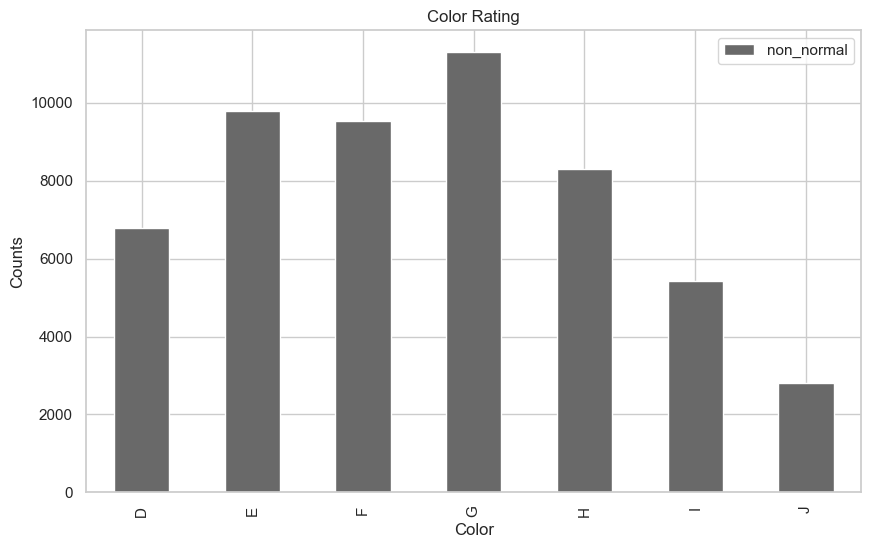

In [23]:
counts = counts.sort_index()
counts.plot(kind='bar', figsize=(10,6), title='Color Rating', color='DimGray')
plt.title('Color Rating')
plt.xlabel('Color')
plt.ylabel('Counts')

Interestingly this seems to almost follow a normal distribution for the breakdown in the color of each diamond. <br><br>
Notes for Presentation:
* 48.41% of the diamonds were rated as colourless at either D-E-F rating
* Breakdown of the near colourless ratings: 20.93% G, 15.39% H, 10.05% I, and 5.21% J

 <br>[Price v Color](#pvcolor) <br> [^ Return to Menu](#single-variable-eda)

<a id="clarity"></a>
## Clarity

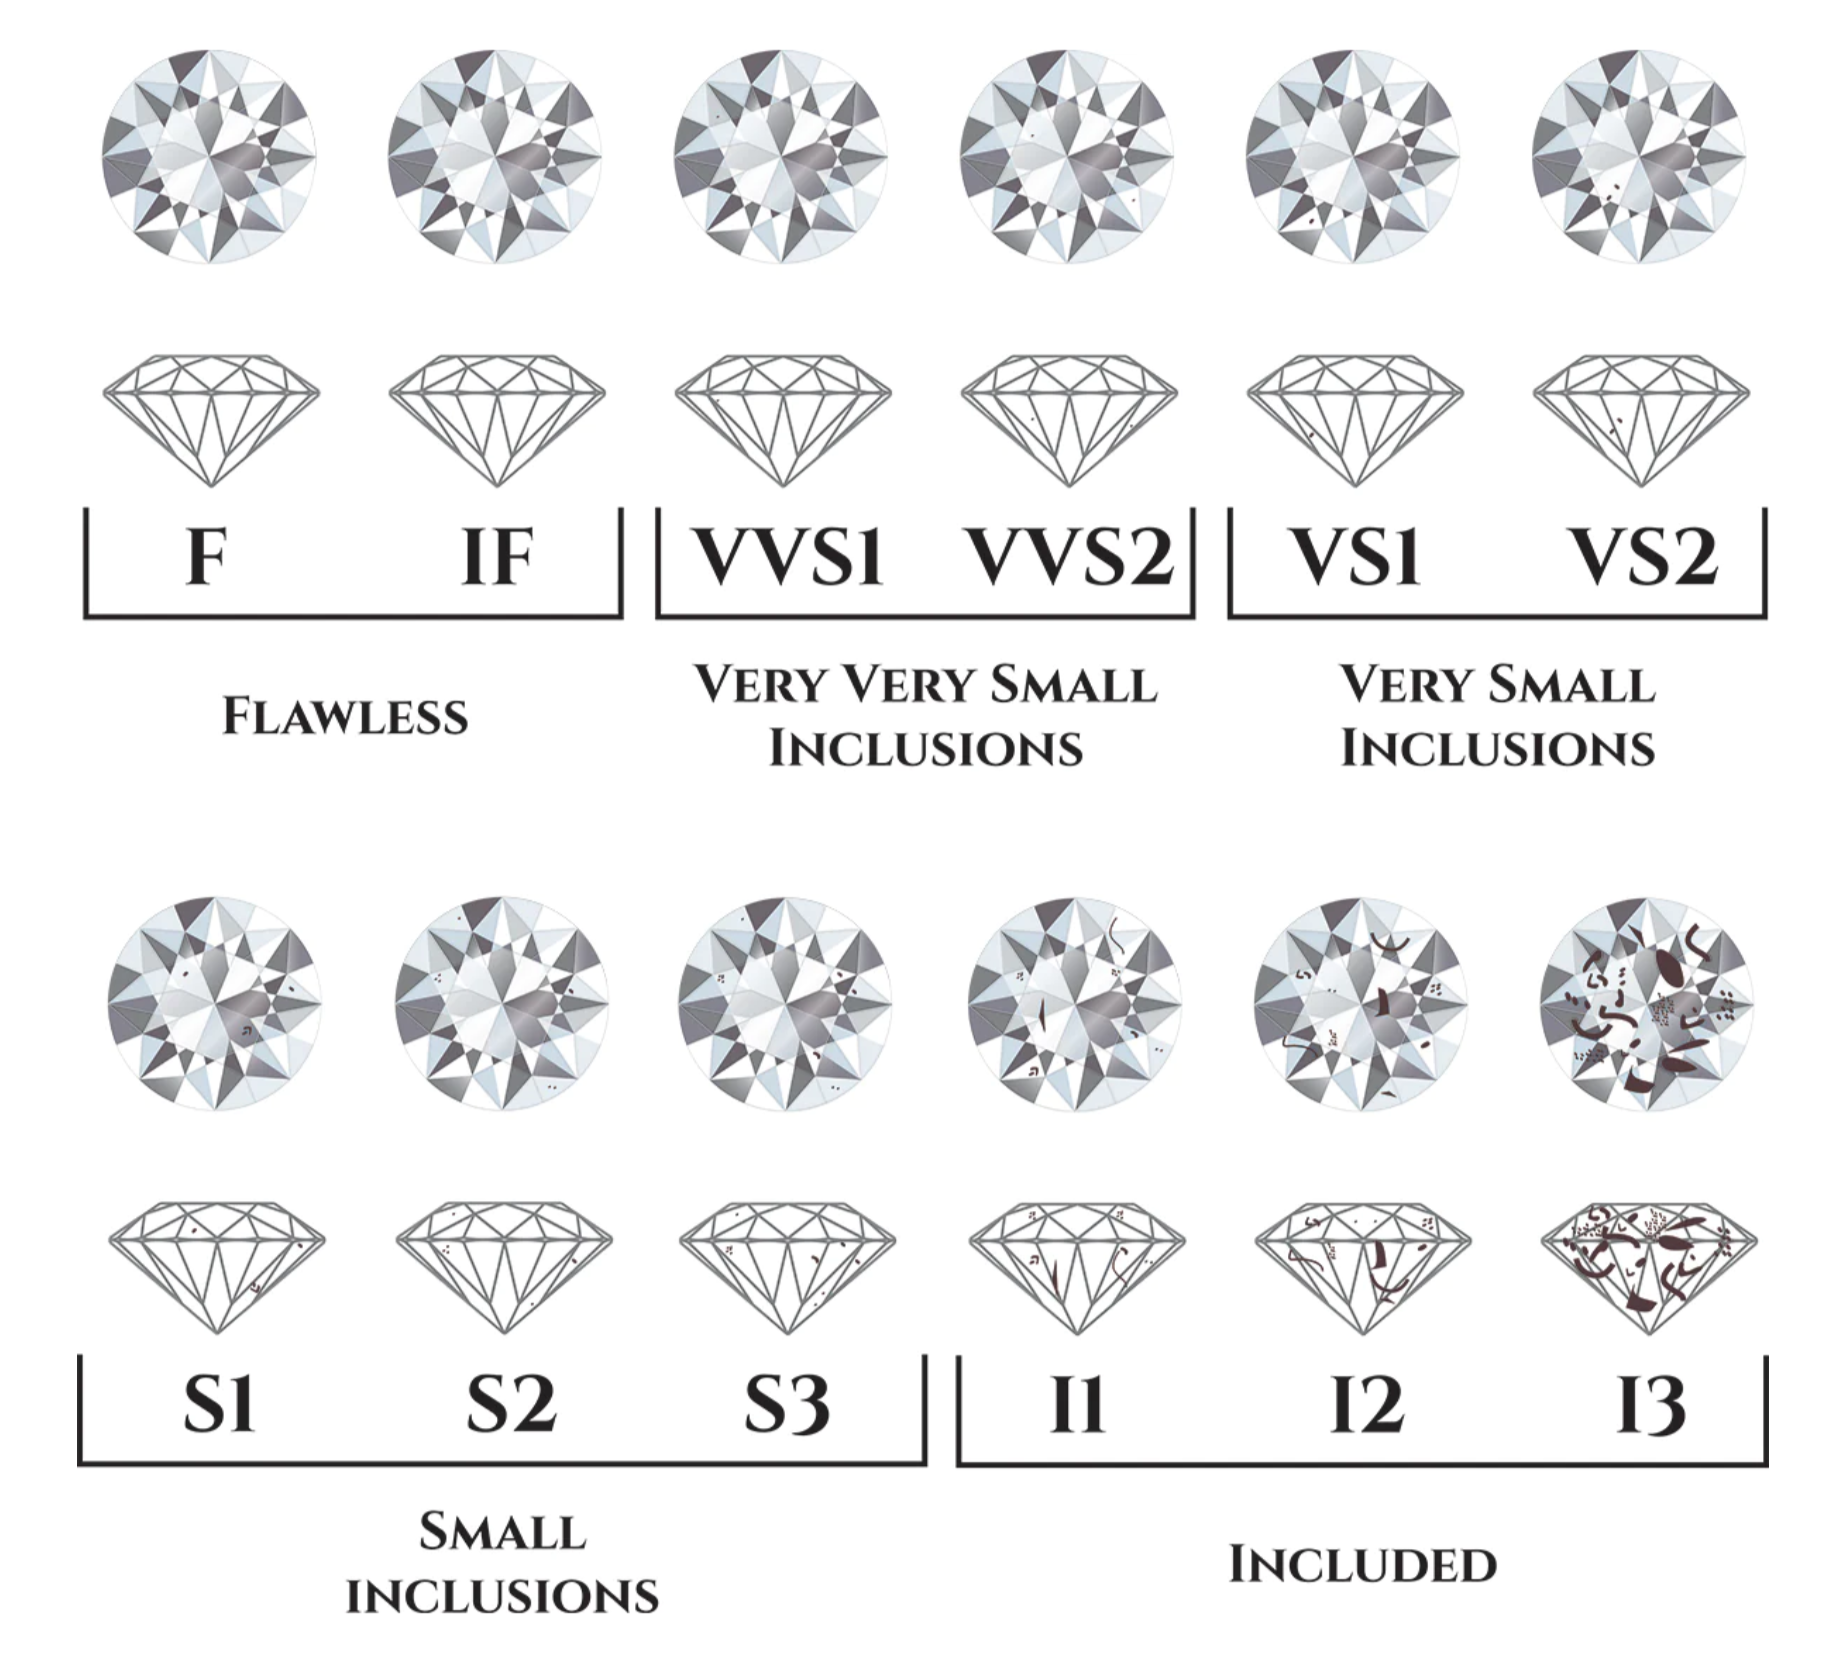

In [24]:
Image("Images/Clarity2.png", width=600, height=500)

Image [Source](https://www.andreabonelli.com/pages/diamond-color-chart) <br> <br>
"Diamond clarity refers to the purity and rarity of the stone, and the degree to which it presents blemishes and inclusions. When forming, natural microscopic characteristics can be trapped within or on the diamond. These internal and surface characteristics are inspected by gemologists, who use 10x magnification and a qualitative grading system to assign a numerical value (clarity grade) to each diamond." [source](https://www.brilliantearth.com/diamond/buying-guide/clarity/)

I believe we will see a similar distribution as the color with a relatively normal distribution. Lets see what we are working with category wise. Lets keep it in grade order to make analysis easier. <br> I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

In [25]:
ranks = ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"]
diamonds["clarity"] = pd.Categorical(diamonds["clarity"], ordered=True, categories=ranks)

non_normal_clarity = diamonds["clarity"].value_counts().sort_index()
normal_clarity = diamonds["clarity"].value_counts(normalize=True).sort_index()

clarity = pd.DataFrame({"non_normal": non_normal_clarity, "normal": normal_clarity})
clarity["normal"] = clarity["normal"].apply(lambda x: f'{(x*100):.2f}%')
display(clarity)

non_normal  normal
clarity                    
IF             1790   3.32%
VVS1           3655   6.78%
VVS2           5066   9.39%
VS1            8171  15.15%
VS2           12258  22.73%
SI1           13065  24.22%
SI2            9194  17.04%
I1              741   1.37%

We see that most of the diamonds are actually relatively low on the clarity scale with minor inclusions. We have 35.68% of the diamonds are rated SI1, 25.11% are rated SI2, and 2.02% are rated I1. Lets see what this looks like plotted: 

Text(0, 0.5, 'Counts')

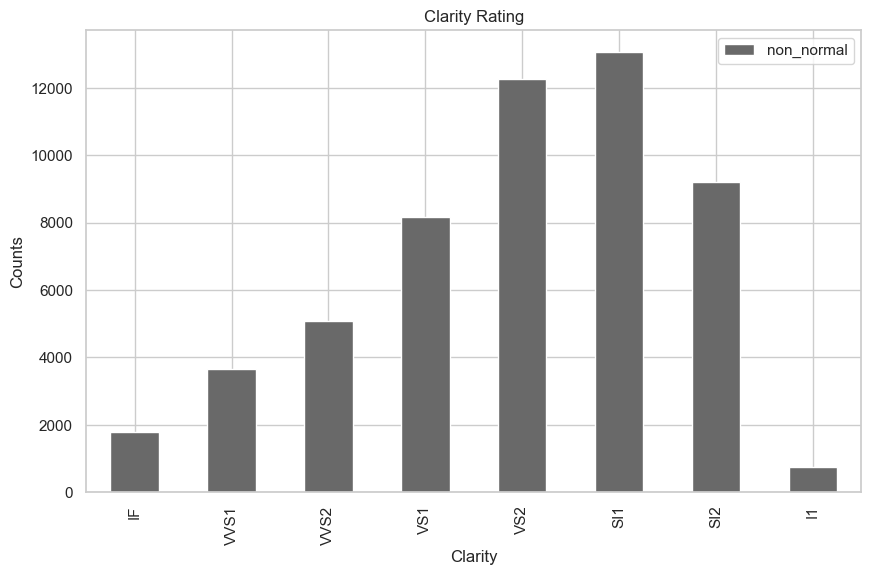

In [26]:
clarity.plot(kind='bar', title='Clarity', figsize=(10,6), color="DimGray")
plt.title('Clarity Rating')
plt.xlabel('Clarity')
plt.ylabel('Counts')

We see an almost normal distribution that is skewed to the left. <br> <br>
Clarity Notes for Presentation:
* The largest clarity category is SI1 with 13,065 (35.68%) of the data. 
* We see a steady increase in clarity peking at SI1, and then dropping aat SI2 and I1.

 <br> [Price v Clarity](#pvclarity) <br> [^ Return to Menu](#single-variable-eda)

<a id="length"></a>
## Length (x)

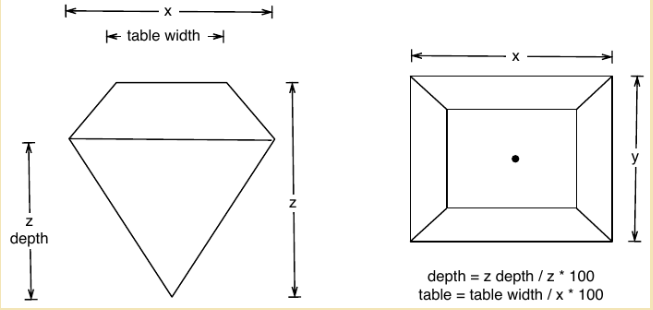

In [27]:
Image("Images/Diamond_Dimensions.png", width=600, height=300)

Image [Source](https://bookdown.dongzhuoer.com/hadley/ggplot2-book/diamonds.html)<br> <br> Now we move into our diamond dimensions. We start with our x dimension which measures the diamond from side to side as shown in the picture. I believe we will see most diamonds in a similar band and relatively normally distributed. 

In [28]:
diamonds["x"].describe()

count    53940.000000
mean         5.731157
std          1.121761
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64

We see a mean of 5.73mm wide and a median of 5.7mm. We see an interquartile range of 4.71mm to 6.54mm which are both relatively equidistant from the median and mean. We see a range from 0 to 10.74mm suggesting that this is normally distributed. 

Freeman Diaconis:  1


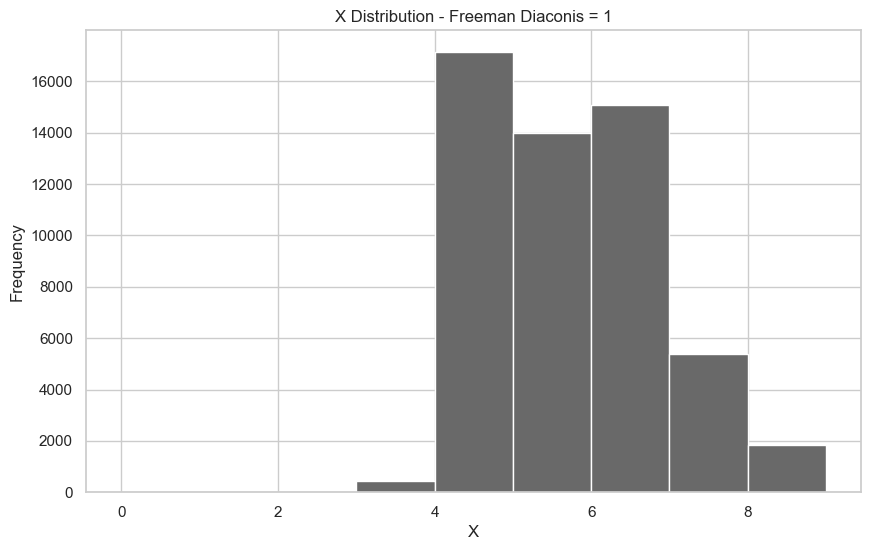

In [29]:
plot_single_variable(diamonds, "x")

This is not as normally distributed as I initially thought, but we do see the large concentration of values inside the IQR.
<br><br>
X Dimension Notes for Presentation:
* We see a large portion of the diamonds are in the IQR between 4.7 to 6.54mm in size 
* Diamond sizes range from 0 to 10.74mm
* The average and median x dimension of diamonds is 5.7mm

 <br> [Price v X](#pvlength) <br> [^ Return to Menu](#single-variable-eda)

<a id="width"></a>
## Width (y)

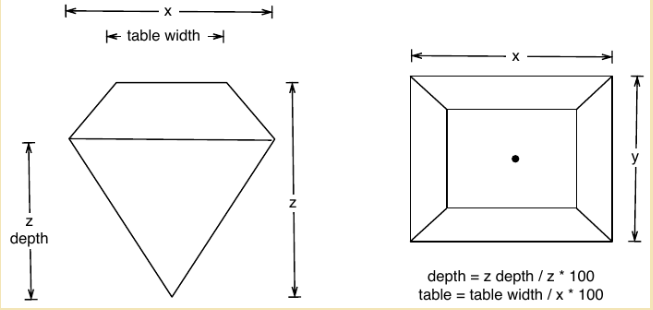

In [30]:
Image("Images/Diamond_Dimensions.png", width=600, height=300)

Image [Source](https://bookdown.dongzhuoer.com/hadley/ggplot2-book/diamonds.html)

We continue with dimensions we see that the y dimension is another measure of the top of the diamond other than x. I expect to see the exact same distribution that we just saw with x. Lets look at the summary statistics:

In [31]:
diamonds["y"].describe()

count    53940.000000
mean         5.734526
std          1.142135
min          0.000000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64

We see that the y dimensions are extremely similar to what we saw in the x with mean 5.73 and median 5.71. We have a similar IQR of 4.72mm to 6.54mm, but here we see that there appears to be a massive outlier at 58.9mm. We see zero values which should be null values because a measurement of 0mm is impossible. Lets get a visual representation of this:

Freeman Diaconis:  1


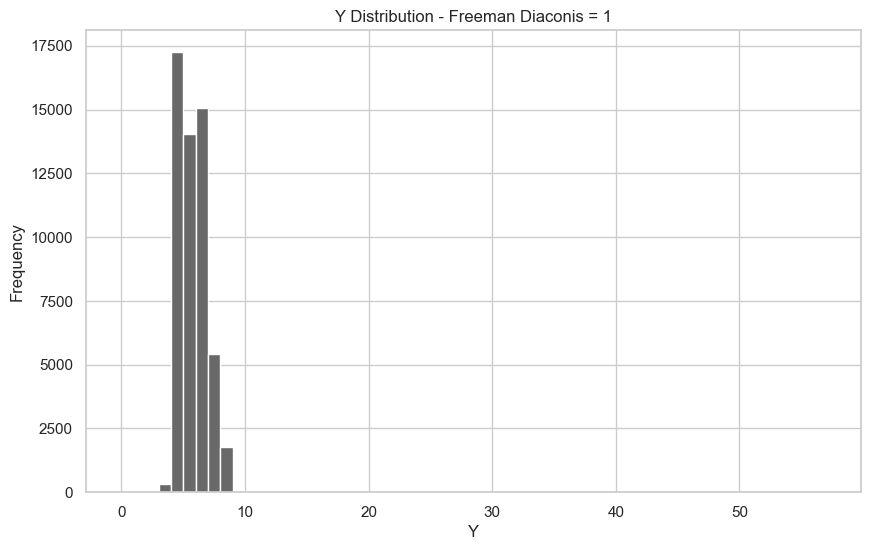

In [32]:
plot_single_variable(diamonds, "y")

This is distributed as we expected with the outlier at 58 causing the graph to zoom out, but data values in the same size range as we saw with x.
<br><br>
Y Dimension Notes for Presentation:
* The average and median y dimension of diamonds is 5.7mm
* We see an IQR ranging from 4.72mm to 6.54mm
* Diamond sizes total range is from 0 to 58.9mm- this indicates some outliers and missing measurements


 <br> [Price v Width](#pvwidth)<br> [^ Return to Menu](#single-variable-eda)

<a id="depthz"></a>
## Depth (z)

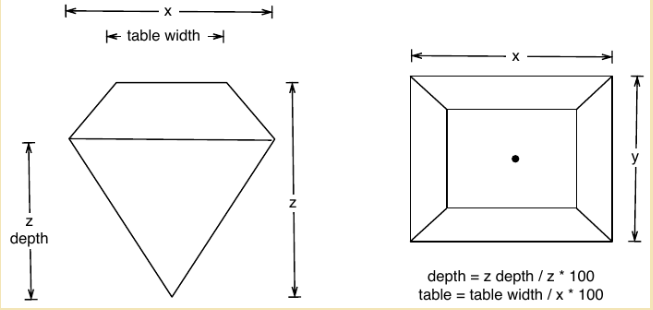

In [33]:
Image("Images/Diamond_Dimensions.png", width=600, height=300)

Image [Source](https://bookdown.dongzhuoer.com/hadley/ggplot2-book/diamonds.html)

Depth is the total height from top to bottom of the diamond as shown in the diagram. I suspect these will also be somewhat normal with a slight right skew as we have been seeing. Lets have a look at the summary statistics:

In [34]:
diamonds["z"].describe()

count    53940.000000
mean         3.538734
std          0.705699
min          0.000000
25%          2.910000
50%          3.530000
75%          4.040000
max         31.800000
Name: z, dtype: float64

We see a mean of 3.54mm and a median of 3.53mm. The interquartile range is from 2.91 to 4.04 and the total range is from 0 to 31.8mm. Something is off here as 0mm should be impossible so these may effectively be null values. As we saw with the y axis there appears there may be large outlier size values to the right of the distribution. 

Freeman Diaconis:  1


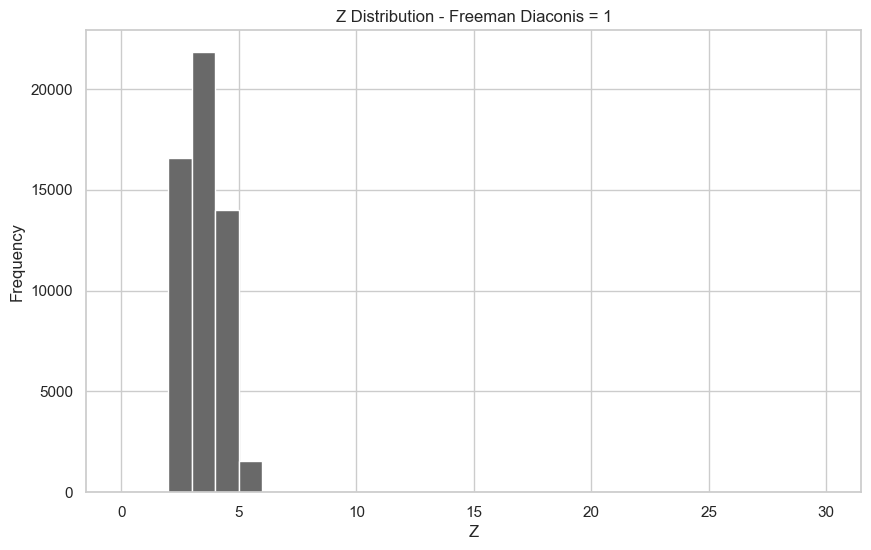

In [35]:
plot_single_variable(diamonds, "z")

This is distributed as we expected with the outlier at 31.8mm causing the graph to zoom out. 
<br><br>
Z Dimension Notes for Presentation:
* The average z dimension is 3.54 and median z dimension is 3.53 
* We see an IQR ranging from 2.91 to 4.04mm
* Diamond sizes total range is from 0 to 31.8mm- this indicates some outliers and missing elements

 <br> [Price v Z](#pvdepthz)<br> [^ Return to Menu](#single-variable-eda)

<a id="depth%"></a>
## Depth (%)

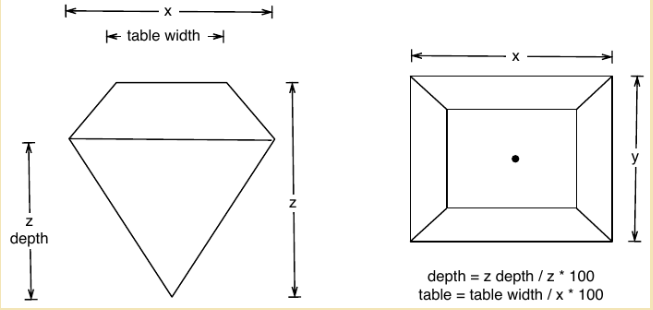

In [36]:
Image("Images/Diamond_Dimensions.png", width=600, height=300)

Image [Source](https://bookdown.dongzhuoer.com/hadley/ggplot2-book/diamonds.html)

Z depth is the percentage of the z measure that takes up the lower half of the diamond as shown in the diagram. I expect this will follow a similar distribution as the other variables have thus far with outliers at larger depths with a relatively normal distribution. Unfortunately we do not know the cut as this determines the ideal depth percentage.

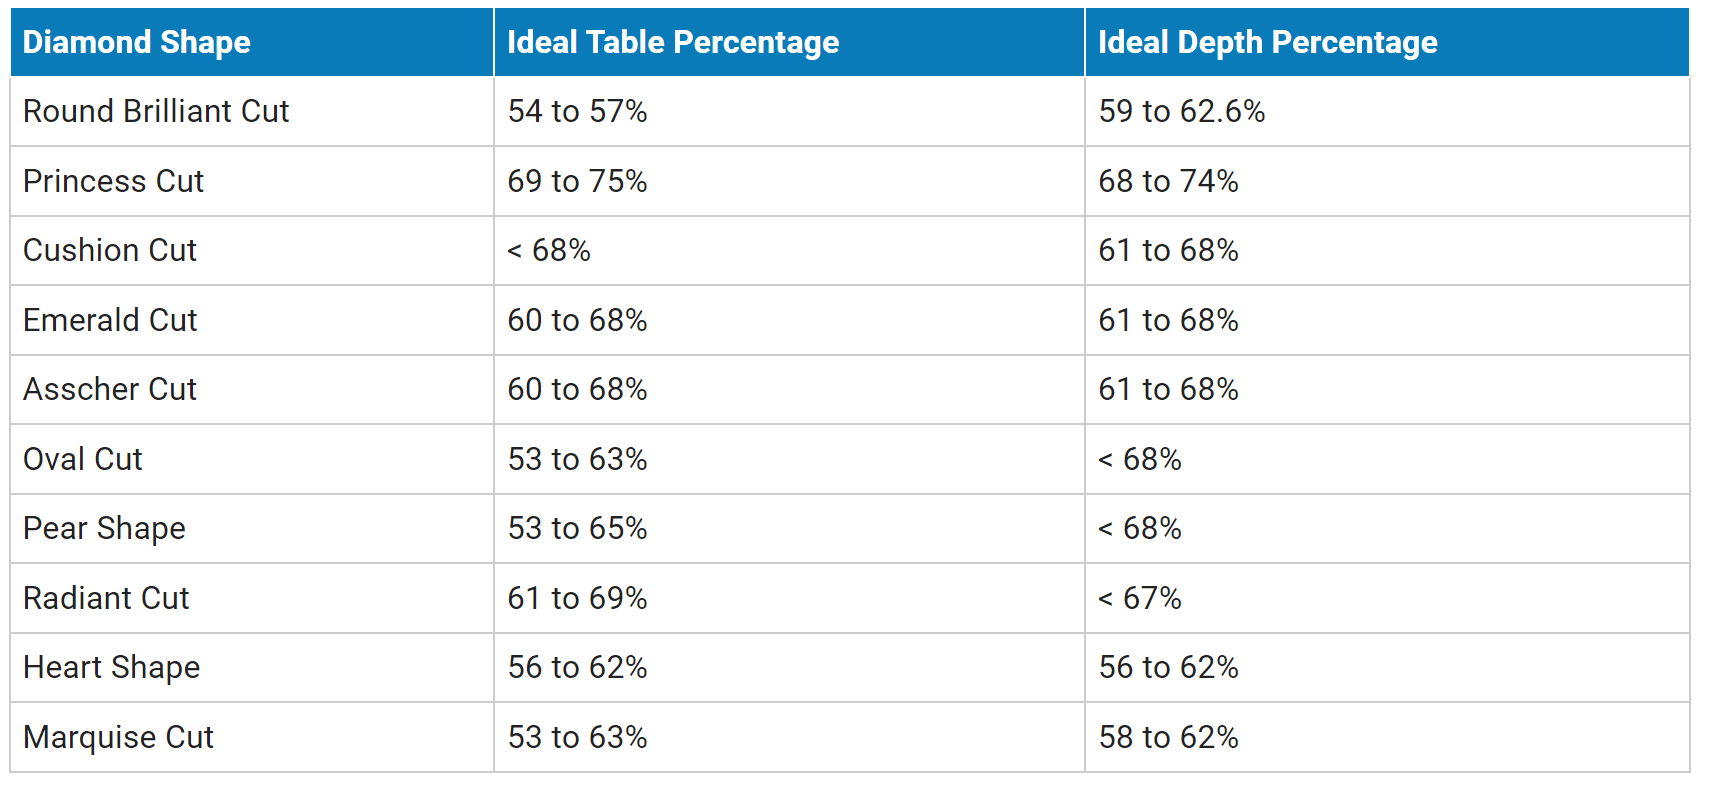

In [37]:
Image("Images/Cut_Information.png", width=800, height=300)

[Image Source](https://www.diamonds.pro/education/diamond-depth-and-table/)

We see that there are diffrerent ideal table percentages for different cut diamonds, We may be able to get an idea of the cut from the depth and table percentages. Most ring diamonds are round cut so I believe that is what we will see. Lets first look at the summary statistics for diamond depth percentage.

In [38]:
diamonds["depth"].describe()

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

We see a mean of 61.75 with a median of 61.8. The interquartile range is 61 to 62.5 which leads me to believe these are round cut diamonds. This looks like it might be similar to what we saw before, but more right skewed than left with the minimum value of 43. 

Freeman Diaconis:  1


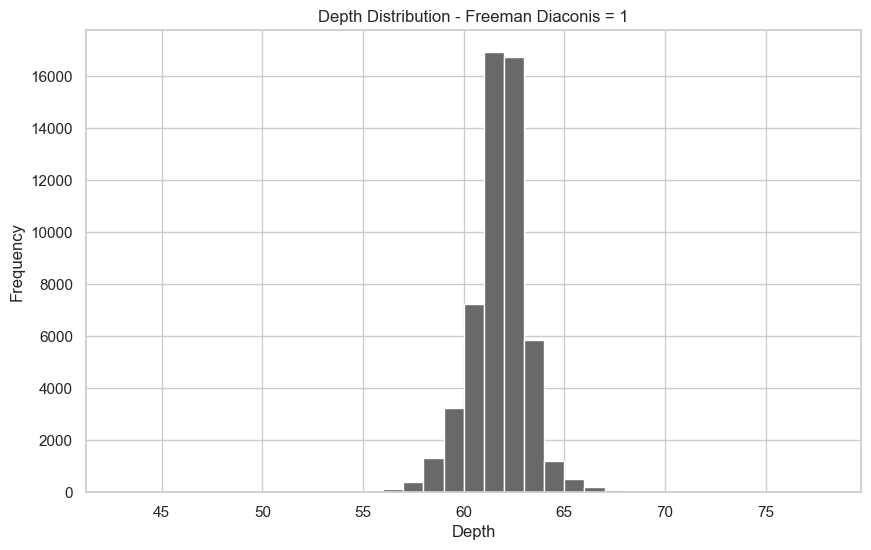

In [39]:
plot_single_variable(diamonds, "depth")

This is distributed is much more normally distributed than expected.
<br><br>
Depth Dimension Notes for Presentation:
* The average depth dimension is 61.75 and median depth 61.8 
* We see an IQR ranging from 61 to 62.5mm
* Diamond sizes total range is from 43 to 79mm

 <br> [Price v Depth(%)](#pvdepth%)<br> [^ Return to Menu](#single-variable-eda)

<a id="tablewidth"></a>
## Table Width(%)

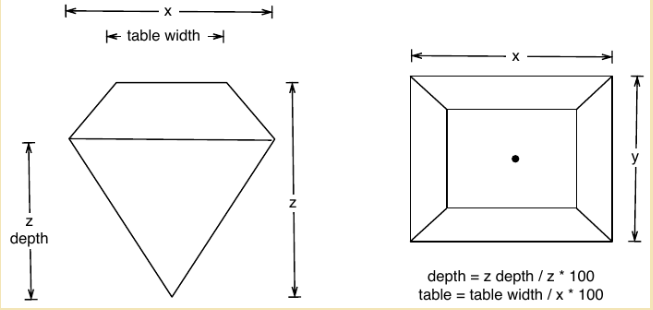

In [40]:
Image("Images/Diamond_Dimensions.png", width=600, height=300)

Image [Source](https://bookdown.dongzhuoer.com/hadley/ggplot2-book/diamonds.html)

Table width is the width of the top most table on a diamond as shown in the diagram. It is the percentage of the total width that is taken up by the table. I expect that table width measurements will directly match the x width distribution.

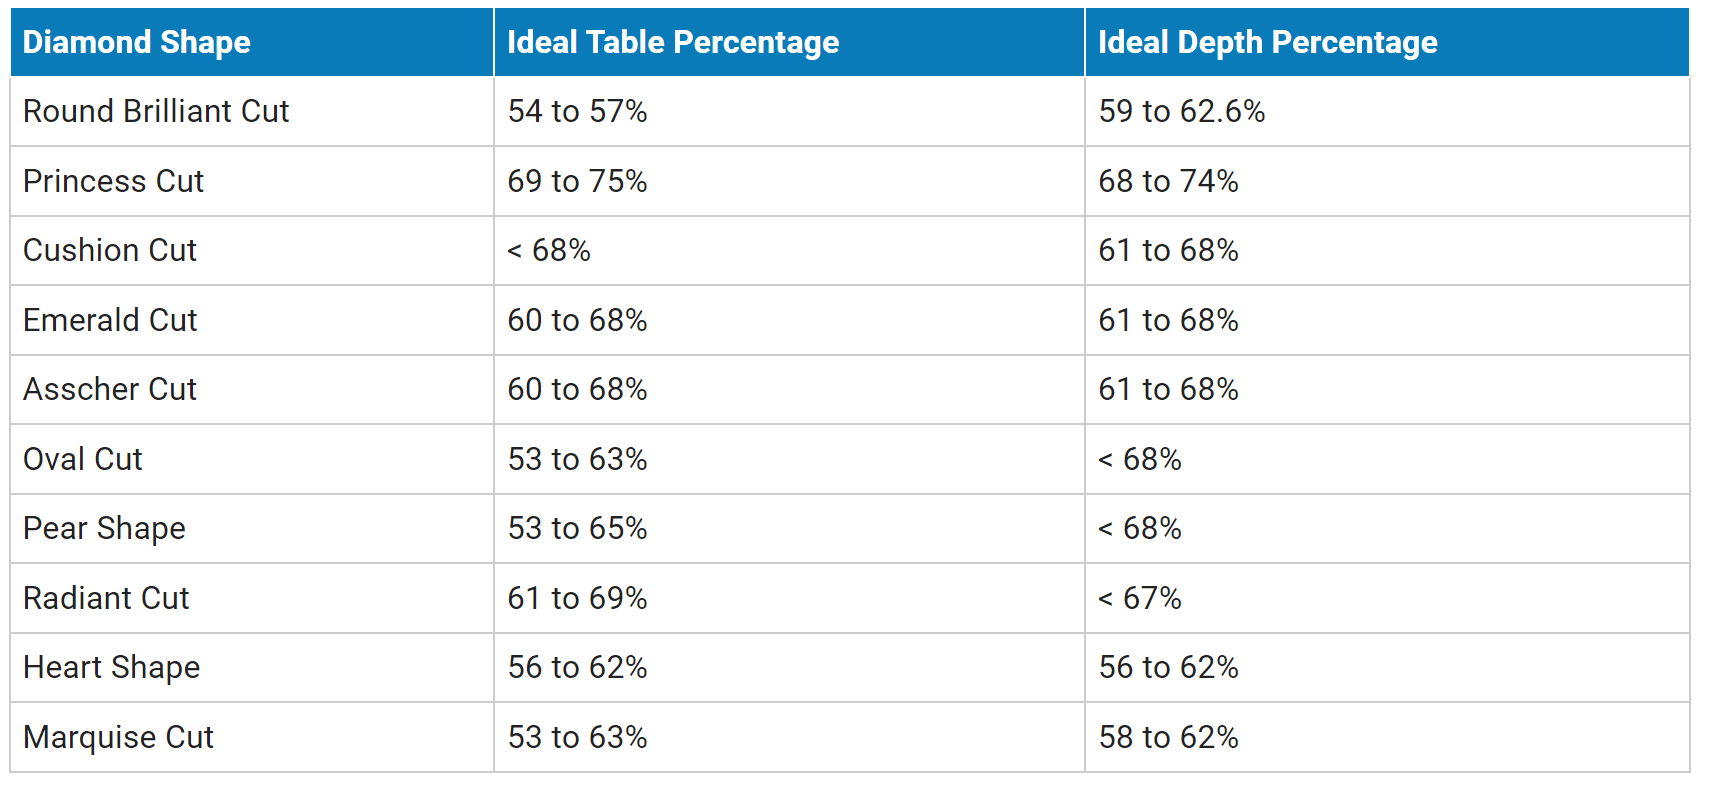

In [41]:
Image("Images/Cut_Information.png", width=800, height=300)

[Image Source](https://www.diamonds.pro/education/diamond-depth-and-table/)

We may be able to more confidently state thesea are round cut by checking the table percentages. Lets start by looking at the IQR and summary statistics for table:

In [42]:
diamonds["table"].describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

We see that there is a mean of 57.46 and median of 57%. The interquartile range is from 56 to 59%. The minimum and maximum values are 43 and 95%. We cannot confirm the diamond type but still suggests it could be round. Lets check out the distribution:

Freeman Diaconis:  1


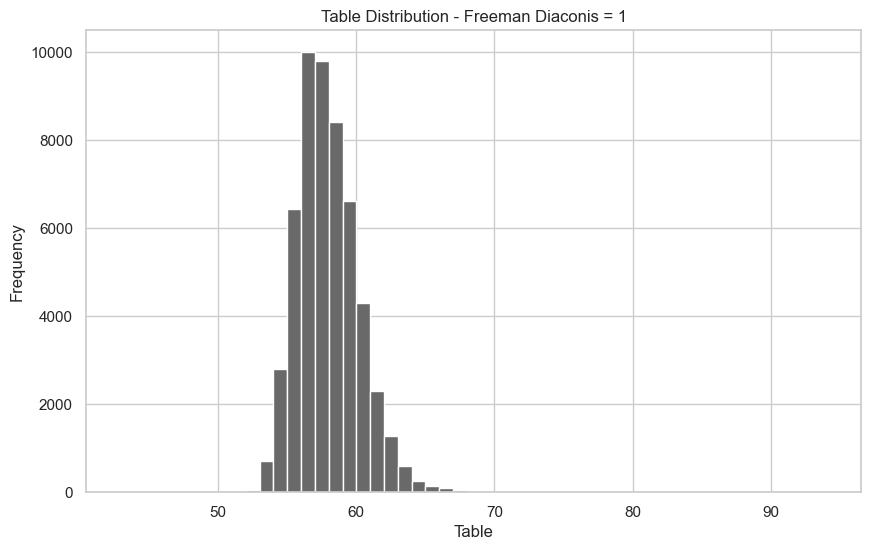

In [43]:
plot_single_variable(diamonds, "table")

We see that the distribution appears normally distributed, and is relatively close to the width variable distribution. 
<br><br>
Table Dimension Notes for Presentation:
* The average table is 57.46% and the median is 57%
* We see an IQR ranging from 56 to 59%
* Diamond sizes total range is from 43 to 95%

 <br> [Price v Table Width](#pvtablewidth)<br> [^ Return to Menu](#single-variable-eda)

## 2. Pairwise EDA

These functions will be used for our pairwise analysis:

In [44]:
def describe_by_category(data, numeric, categorical, transpose=False):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        print(grouped_y.transpose())
    else:
        print(grouped_y)

In [45]:
def restyle_boxplot(patch):
    ## change color and linewidth of the whiskers
    for whisker in patch['whiskers']:
        whisker.set(color='#000000', linewidth=1)

    ## change color and linewidth of the caps
    for cap in patch['caps']:
        cap.set(color='#000000', linewidth=1)

    ## change color and linewidth of the medians
    for median in patch['medians']:
        median.set(color='#000000', linewidth=2)

    ## change the style of fliers and their fill
    for flier in patch['fliers']:
        flier.set(marker='o', color='#000000', alpha=0.2)

    for box in patch["boxes"]:
        box.set( facecolor='#FFFFFF', alpha=0.5)

In [46]:
def pairwise_boxplot(data, numeric, categorical, vert=True):
    figure = plt.figure(figsize=(8, 4))
    axes = figure.add_subplot(1, 1, 1)

    labels = sorted(pd.unique(data[categorical].values))

    grouped = data.groupby(categorical)
    grouped_data = [grouped[numeric].get_group(k) for k in labels]

    patch = axes.boxplot(grouped_data, labels=labels, patch_artist=True, vert=True)
    restyle_boxplot(patch)
    axes.set_xlabel(f"{categorical.capitalize()}") 
    axes.set_ylabel(f"{numeric.capitalize()}")
    axes.set_title(f"{numeric.capitalize()} by Distribution of {categorical.capitalize()}") 
    plt.show()
    plt.close()

In [47]:
def get_r_and_rho(data, variable1, variable2):
    print("r   = ", stats.pearsonr( data[variable1], data[variable2])[0])
    print("rho = ", stats.spearmanr( data[variable1], data[variable2])[0])

In [48]:
def pairwise_scatterplot(data, variable1, variable2, lowess=True):
    figure = plt.figure(figsize=(10, 6))
    axes = figure.add_subplot(1, 1, 1)

    if lowess:
        low = sm.nonparametric.lowess(data[variable2], data[variable1])
        lowess_x = list(zip(*low))[0]
        lowess_y = list(zip(*low))[1]
        axes.scatter( data[variable1], data[variable2], marker="o", color="dimgray")
        axes.plot(lowess_x, lowess_y, color="DarkRed")
        axes.set_title(f"{variable1.capitalize()} vs. {variable2.capitalize()} with Lowess")
    else:
        axes.scatter( data[variable1], data[variable2], marker="o", color="dimgray")
        axes.set_title(f"{variable1.capitalize()} vs. {variable2.capitalize()}")
    axes.set_xlabel(f"{variable1.capitalize()}")
    axes.set_ylabel(f"{variable2.capitalize()}")

    plt.show()
    plt.close()

<a id="pricemenu"></a>
## Price v. ?

* [Price v. Carat](#pvcarat)
* [Price v. Cut](#pvcut)
* [Price v. Color](#pvcolor) 
* [Price v. Clarity](#pvclarity)
* [Price v. Length (x)](#pvlength)
* [Price v. Width  (y)](#pvwidth)    
* [Price v. Depth  (z)](#pvdepthz)
* [Price v. Depth  (%)](#pvdepth%)
* [Price v. Table  (%)](#pvtablewidth)

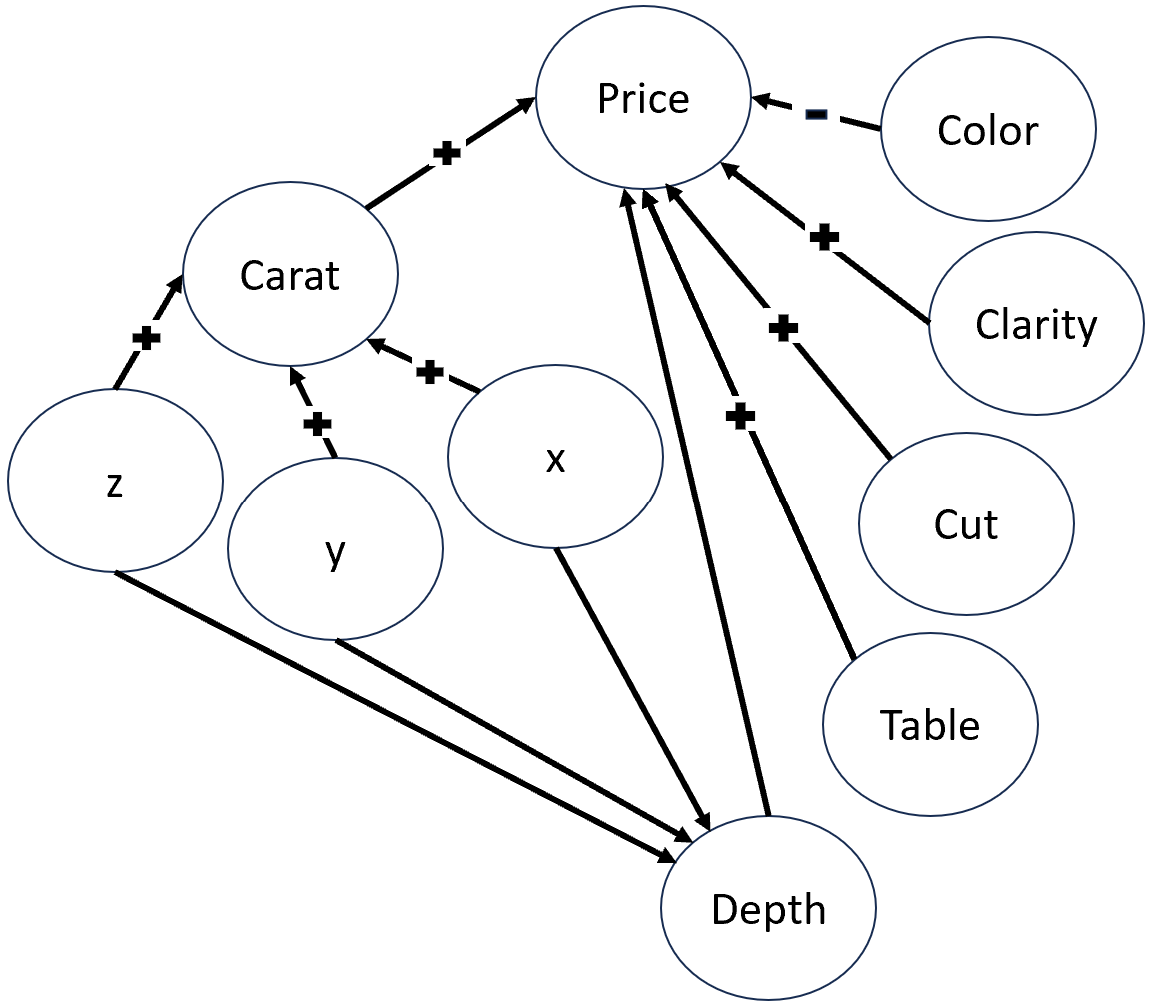

In [49]:
Image("Images/Causal_Loop_Diagram.png", width=600, height=600)

<a id="pvcarat"></a>
## Price v. Carat

[^ Carat](#carat)

Based ont he causal loop diagram we hypothesize that the price and carat have a positive correlation. As the weight should increase price, but other factors like cut and clarity affect price as well. Lets look at the r's

In [50]:
get_r_and_rho(diamonds, "price", "carat")

r   =  0.9215913011934771
rho =  0.9628827988813001


Wow that is a very strong correlation and much higher than I would have thought it would be with a Pearsons $r$ of .92 and Spearmans $\rho$ of .96. Lets plot this to visualize:

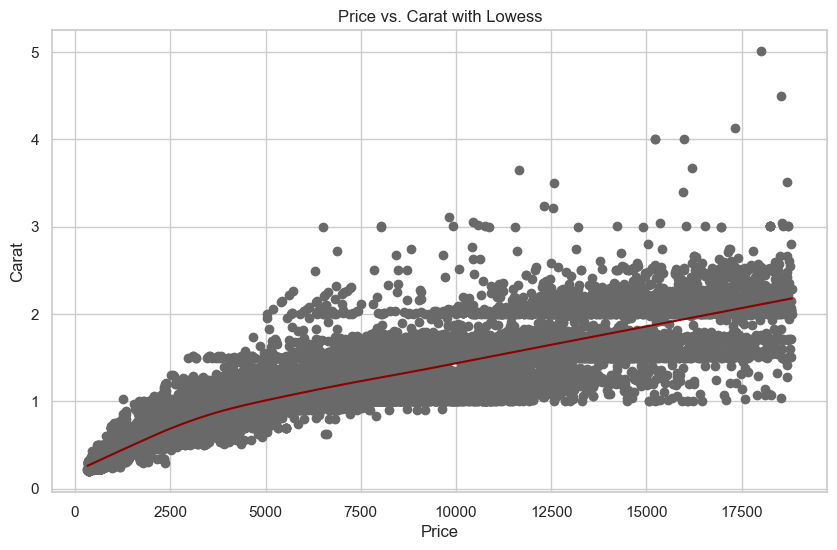

In [51]:
pairwise_scatterplot(diamonds, "price", "carat", lowess=True)

Wow we pretty clearly see the strong monotonic relationship
  <br> [Return to Price Menu](#pricemenu)

<a id="pvcut"></a>
## Price v. Cut

[^ Cut](#cut)

We hypothesis that the cut will also be a strong positive correlation to price. As a reminder the scale for cut is: 

Cut from worst to best: (Fair, Good, Very Good, Premium, Ideal)

I expect to see price increase as quality increases. I want to view these in order from worst to best so that it is easier to interpret.

In [52]:
temp = diamonds.copy()

ranks = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
temp["cut"] = pd.Categorical(temp["cut"], ordered=True, categories=ranks)

describe_by_category(temp, "price", "cut")

             count         mean          std    min      25%     50%      75%  \
cut                                                                             
Fair        1610.0  4358.757764  3560.386612  337.0  2050.25  3282.0  5205.50   
Good        4906.0  3928.864452  3681.589584  327.0  1145.00  3050.5  5028.00   
Very Good  12082.0  3981.759891  3935.862161  336.0   912.00  2648.0  5372.75   
Premium    13791.0  4584.257704  4349.204961  326.0  1046.00  3185.0  6296.00   
Ideal      21551.0  3457.541970  3808.401172  326.0   878.00  1810.0  4678.50   

               max  
cut                 
Fair       18574.0  
Good       18788.0  
Very Good  18818.0  
Premium    18823.0  
Ideal      18806.0  


The prices actually seem like they don't fluctuate very much by cut indicating that this may not be as important a characteristic as initially thought. We see that the mean price of a fair cut diamond is $4,358 which is higher than good, very good, and ideal categories which are all better cuts. We see that Q1 is also higher at $2,050 than every other diamond category, and all of which are higher rated.

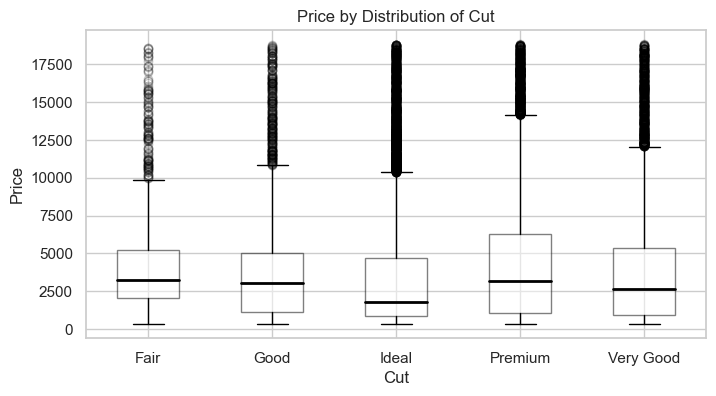

In [53]:
pairwise_boxplot(temp, "price", "cut")

We do see that fair has a highermean and Q1 than the other categories. Premium cut has the highest prices of any cut, but is not he highest category. Oddly ideal is the highest cut grade but actually has the lowest interquartile range and mean price. There is not enough evidence here to suggest cut directly affects price. 

Price v. Cut for Presentation:<br>

* We do not see a direct positive or negative correlation between price and cut

  <br> [Return to Price Menu](#pricemenu)

<a id="pvcolor"></a>
## Price v. Color

[^ Color](#pricemenu)

I hypothesize price and color will be similar to cut and will have a weak positive relationship to price. Lets take a look. As a reminder here are the color rankings: 

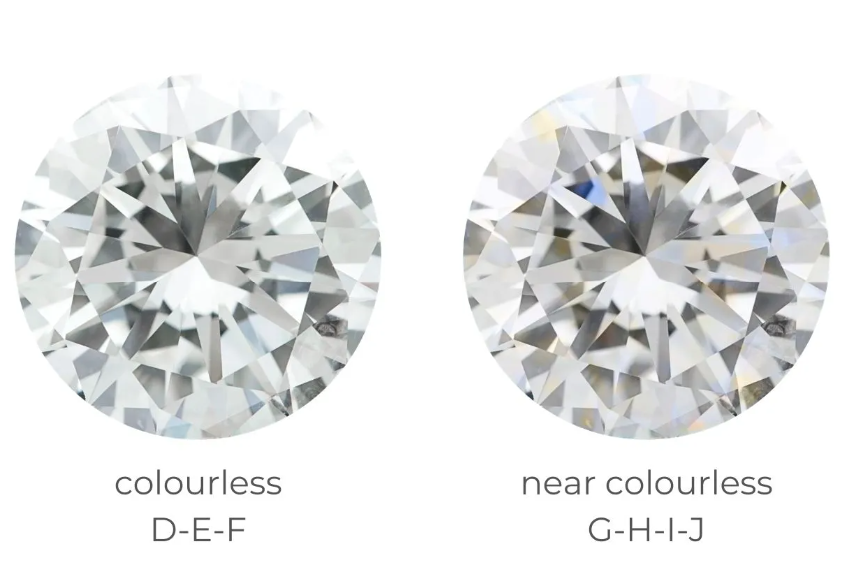

In [54]:
Image("Images/Diamond_Colors.png", width=300, height=200)

Image [Source](https://diamondbuzz.blog/diamond-properties-and-characteristics/)

In [55]:
describe_by_category(diamonds, "price", "color")

         count         mean          std    min     25%     50%      75%  \
color                                                                      
D       6775.0  3169.954096  3356.590935  357.0   911.0  1838.0  4213.50   
E       9797.0  3076.752475  3344.158685  326.0   882.0  1739.0  4003.00   
F       9542.0  3724.886397  3784.992007  342.0   982.0  2343.5  4868.25   
G      11292.0  3999.135671  4051.102846  354.0   931.0  2242.0  6048.00   
H       8304.0  4486.669196  4215.944171  337.0   984.0  3460.0  5980.25   
I       5422.0  5091.874954  4722.387604  334.0  1120.5  3730.0  7201.75   
J       2808.0  5323.818020  4438.187251  335.0  1860.5  4234.0  7695.00   

           max  
color           
D      18693.0  
E      18731.0  
F      18791.0  
G      18818.0  
H      18803.0  
I      18823.0  
J      18710.0  


Wow oddly we see that the mean price gradually increases the more color the diamond has, and is directly opposite of what we expected to see. The mean goes from $3,169.95 for D color up to $5,323.82 for J color, and increases for each category. We also see that the interquartile ranges also gradually shift upward in price starting from $911 to $4213 for D color then moving up to $1,860.5 to $7,695. Lets plot this to see this trend:

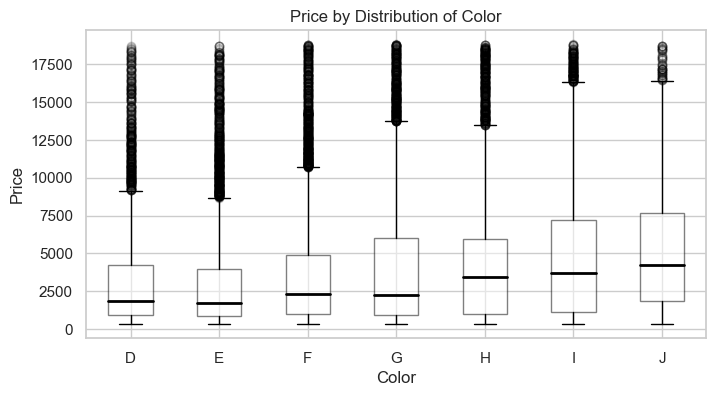

In [56]:
pairwise_boxplot(diamonds, "price", "color")

It is very gradually but the very gradual increase in price is there. <br>

Price v. Color for Presentation:<br>
* We see a IQRs gradual increase in price for each category from D to J with J having the highest prices
* D color average price is $3169 and J color average price of $5323
* D color median price is $1838 and J color median price of $4234
* We see a weak positive relationship between color and price with price increasing with color
  <br> <br>[Return to Price Menu](#pricemenu)

<a id="pvclarity"></a>
## Price v. Clarity

[^ Clarity](#clarity)

We hypothesis this will have a moderate positive relationship with price increase as clarity increases. As a reminder the rankings for clarity: <br> I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

In [57]:
describe_by_category(diamonds, "price", "clarity")

           count         mean          std    min      25%     50%      75%  \
clarity                                                                       
IF        1790.0  2864.839106  3920.248499  369.0   895.00  1080.0  2388.50   
VVS1      3655.0  2523.114637  3334.838888  336.0   816.00  1093.0  2379.00   
VVS2      5066.0  3283.737071  3821.647537  336.0   794.25  1311.0  3638.25   
VS1       8171.0  3839.455391  4011.747958  327.0   876.00  2005.0  6023.00   
VS2      12258.0  3924.989395  4042.302816  334.0   900.00  2054.0  6023.75   
SI1      13065.0  3996.001148  3799.483853  326.0  1089.00  2822.0  5250.00   
SI2       9194.0  5063.028606  4260.458578  326.0  2264.00  4072.0  5777.25   
I1         741.0  3924.168691  2806.778270  345.0  2080.00  3344.0  5161.00   

             max  
clarity           
IF       18806.0  
VVS1     18777.0  
VVS2     18768.0  
VS1      18795.0  
VS2      18823.0  
SI1      18818.0  
SI2      18804.0  
I1       18531.0  


These prices seem to jump around with no clear trend. The means and interquartile ranges jump around with no clear correlation as to price and clarity.

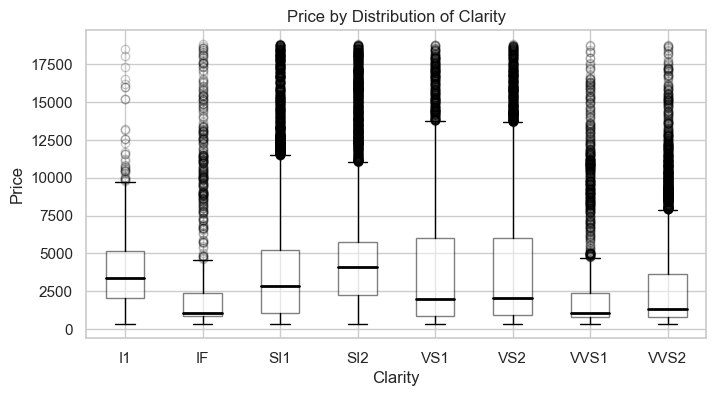

In [58]:
pairwise_boxplot(diamonds, "price", "clarity")

This is slightly unordered with only IF out of place, but we see that there is no clear pattern here between clarity and price. 
<br>

Price v. Clarity for Presentation:<br>
* We see that means and IQRs jump around with no clear trend as to any correlations
  <br> <br>[Return to Price Menu](#pricemenu)

<a id="pvlength"></a>
## Price v. Length(x)

[^ Length X](#length)

Lets now look at price compared to length. Since we saw a very strong correlation in regards to price and carat, and the larger a diamond the more it weights, I believe that this will be a strong positive correlation between these two. 

In [59]:
get_r_and_rho(diamonds, "price", "x")

r   =  0.8844351610161272
rho =  0.9631961087113347


Wow we see a strong linear relationship with Pearsons $r$ at 0.88 and a very strong monotonic relationship with Spearmans $\rho$ at 0.96 which is in line with what we expected based on carats impact. Lets plot this.

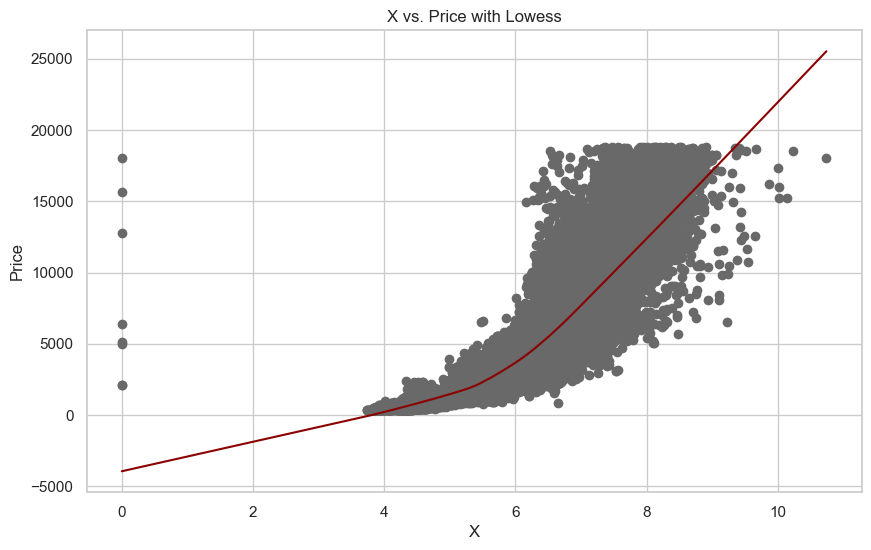

In [60]:
pairwise_scatterplot(diamonds, "x", "price", lowess=True)

We see that strong monotonic positive relationship here very clearly. We also see the impossible zero values that may be impacting our $r$ and $\rho$ values on the left side of this graph.
<br>

Price v. Length(x) for Presentation:<br>
* We see a very strong positive relationship between price and length
  <br> <br>[Return to Price Menu](#pricemenu)

<a id="pvwidth"></a>
## Price v. Width(y)

[^ Width Y](#width)

I expect to see practically the exact $r$ and $\rho$ values for width as we saw with length. We hypothesize price will increase as width increases. Lets look:

In [61]:
get_r_and_rho(diamonds, "price", "y")

r   =  0.8654208978641867
rho =  0.9627188193892315


As expected we get almost the exact same values with a strong positive linear relationship and Pearson's $r$ at 0.86 and a very strong monotonic relationship with Spearman's $\rho$ at 0.96. Lets plot this.

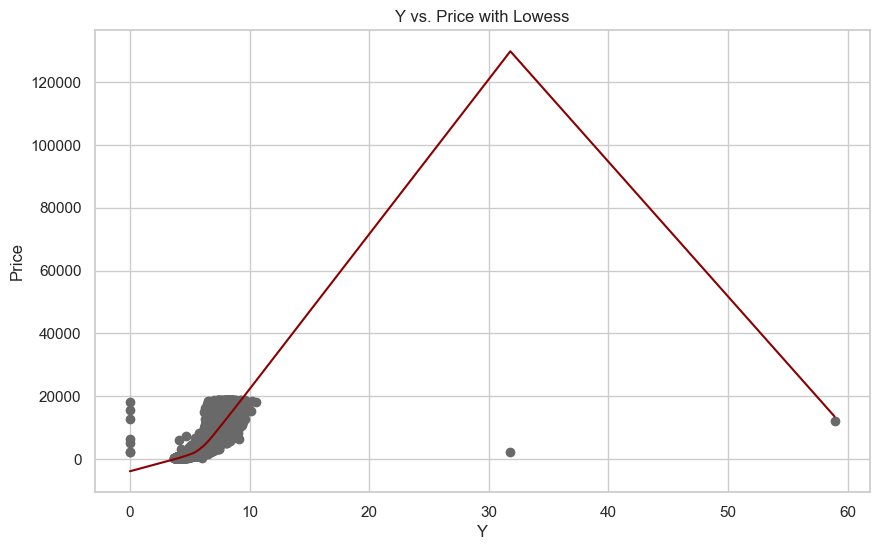

In [62]:
pairwise_scatterplot(diamonds, "y", "price", lowess=True)

Our outlier here is affecting our ability to see the lowess. Lets see take a closer look

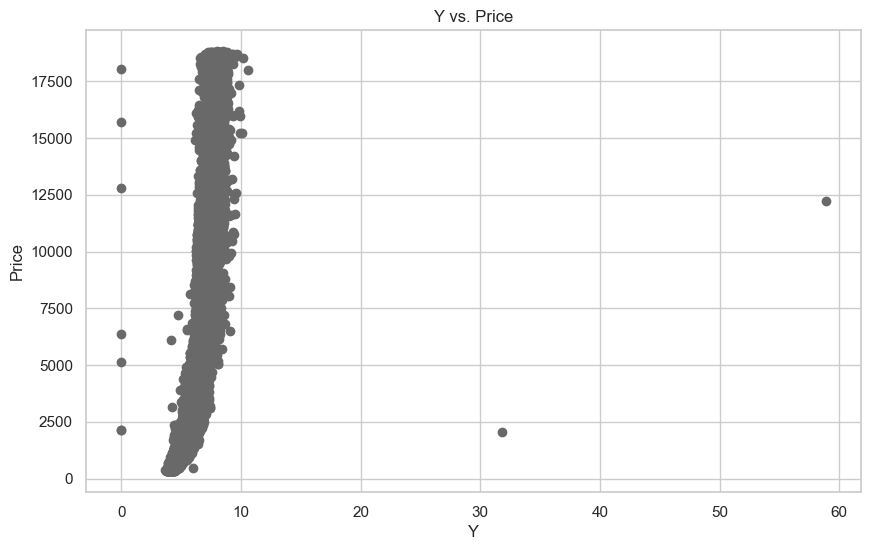

In [63]:
pairwise_scatterplot(diamonds, "y", "price", lowess=False)

We see the very strong. We also see the impossible zero values that may be impacting our $R$ and $\rho$ values on the left side of this graph as well as some outliers that are causig the graph to slightly zoom out. 
<br>

Price v. Width(y) for Presentation:<br>
* We see a very strong positive relationship between price and length
* We see the same trend with width as we saw with length
  <br> <br>[Return to Price Menu](#pricemenu)

<a id="pvdepthz"></a>
## Price v. Depth(z)

[^ Depth Z](#depthz)

I hypothesize the depth will have more of a positive linear relationship than we saw with the length and width, and I still expect strong positive relationship here.

In [64]:
get_r_and_rho(diamonds, "price", "z")

r   =  0.8612494438514485
rho =  0.9572322686120687


We see the exact same Pearson's $r$ indicating a strong linear relationship at 0.86 and Spearman's $\rho$ indicating a very strong monotonic relationship at 0.96 as we did with the length and width

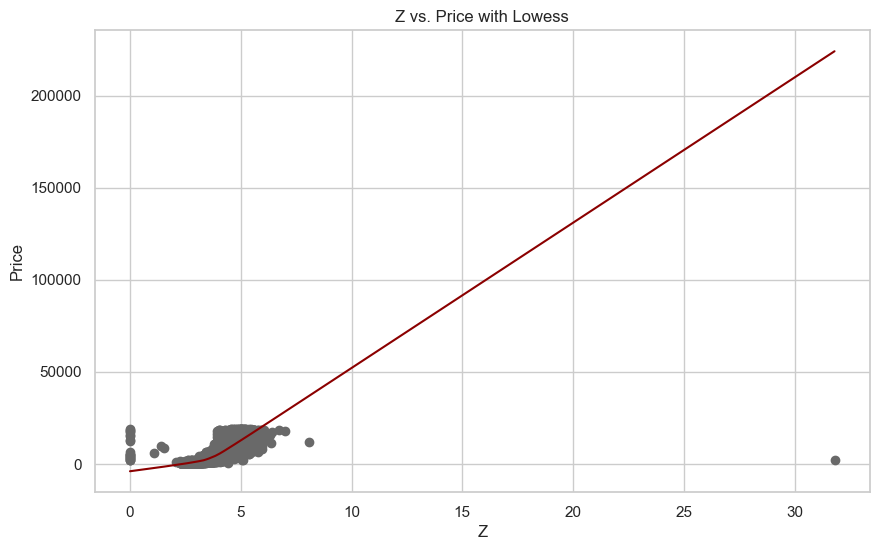

In [65]:
pairwise_scatterplot(diamonds, "z", "price", lowess=True)

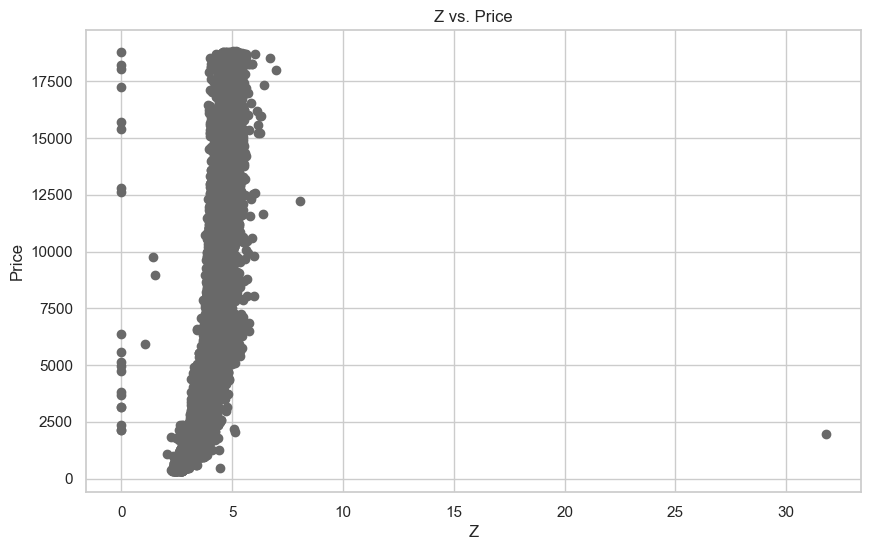

In [66]:
pairwise_scatterplot(diamonds, "z", "price", lowess=False)

This plot looks almost identical to the width graphic, but we see that z has even more invalid zero values. 
<br>

Price v. Depth(z) for Presentation:<br>
* We see a very strong positive relationship between price and depth
* We see the same trend with depth as we saw with width and length
  <br> <br>[Return to Price Menu](#pricemenu)

<a id="pvdepth%"></a>
## Price v. Depth(%)

[^ Depth %](#depth%) 

With depth percentage I hypothesize that the closer the percentage to the middle ideal zone, the higher the value. We should almost see an upside down v so we may not get a good r value but lets see.

In [67]:
get_r_and_rho(diamonds, "price", "depth")

r   =  -0.010647404584142983
rho =  0.01001966963455154


Wow it seems there is almost no correlation between price and depth with Pearson's $r$ at -0.1 indicating almost no linear relationship and Spearman's $\rho$ at 0.01 inidicating almost no monotonic relationship. Lets plot this to see how it looks. 

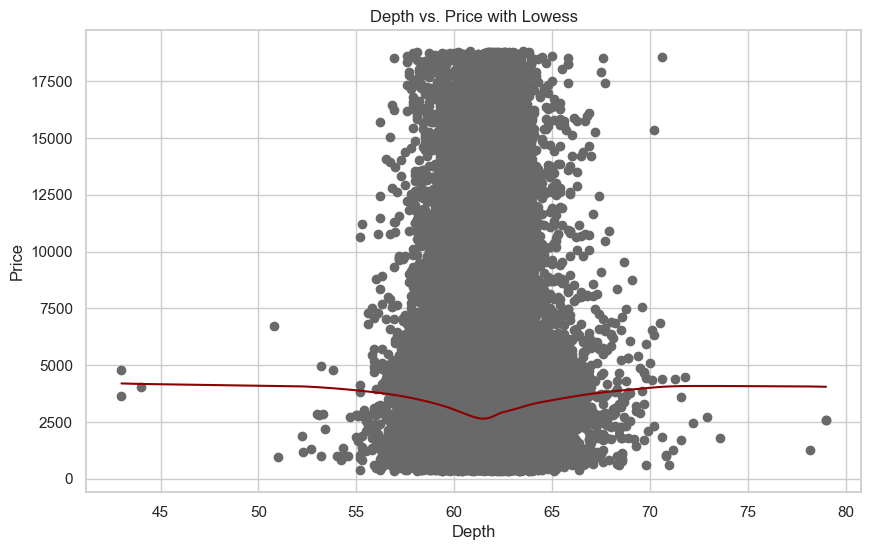

In [68]:
pairwise_scatterplot(diamonds, "depth", "price", lowess=True)

This is very interesting to see as we see a range of depths at each price range. We do see that the band gets tighter as the price increases which suggests that hitting that ideal depth percentage does increase price. <br>

Price v. Depth(%) for Presentation:<br>
* Depth percentage has no linear or monotonic impact on price
* We see a range of depths at each price point
  <br> <br>[Return to Price Menu](#pricemenu)

<a id="pvtable"></a>
## Price v. Table(%)

[^ Table](#tablewidth) 

I would have expected larger table percentage to increase price, but based on depth percentage I actually think it will have no impact on price as well. We should also see a slight tightening of the percentages as the price increases. Lets look at this:

In [69]:
get_r_and_rho(diamonds, "price", "table")

r   =  0.12713390212174208
rho =  0.17178447793764812


It is not quite as bad we see a very weak positive correlation with Pearson's $r$ at 0.13 and a very weak monotonic relationship with Spearman's $\rho$ at 0.17

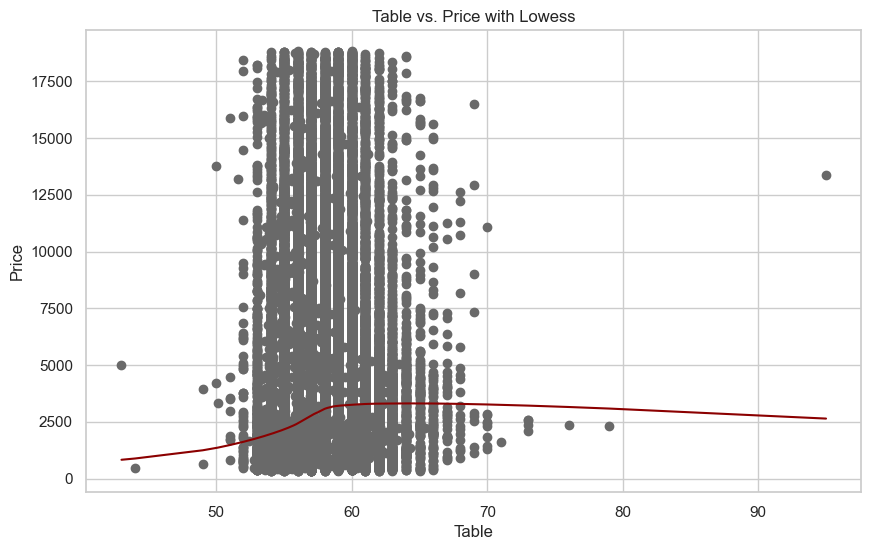

In [70]:
pairwise_scatterplot(diamonds, "table", "price", lowess=True)

This is very interesting to see as we see a range of table widths at each price range. We do not see as clear of a tightening of the table range as price increases that we saw with depth. <br>

Price v. Table(%) for Presentation:<br>
* Table percentage has a very weak linear or monotonic impact on price
* We see a range of table widths at each price point
  <br> <br>[Return to Price Menu](#pricemenu)